## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

**Business problem overview**

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Step 1: Importing and Merging Data

In [ ]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Importing all datasets
df1 = pd.read_csv("https://github.com/Debasish-Rath93/Telecom-Churn-Case-Study-Upgrad/raw/main/telecom_churn_data1.csv")
column_names = list(df1.columns)
df2 = pd.read_csv("https://github.com/Debasish-Rath93/Telecom-Churn-Case-Study-Upgrad/raw/main/telecom_churn_data2.csv", header=None)
df3 = pd.read_csv("https://github.com/Debasish-Rath93/Telecom-Churn-Case-Study-Upgrad/raw/main/telecom_churn_data3.csv", header=None)
df4 = pd.read_csv("https://github.com/Debasish-Rath93/Telecom-Churn-Case-Study-Upgrad/raw/main/telecom_churn_data4.csv", header=None)
df5 = pd.read_csv("https://github.com/Debasish-Rath93/Telecom-Churn-Case-Study-Upgrad/raw/main/telecom_churn_data5.csv", header=None)
# assign column names to the dataframes
df2.columns = column_names
df3.columns = column_names
df4.columns = column_names
df5.columns = column_names
# concatenate dataframes vertically
telecom = pd.concat([df1, df2, df3, df4, df5], axis=0)
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7.000843e+09      109.0             0.0             0.0             0.0   
1   7.001866e+09      109.0             0.0             0.0             0.0   
2   7.001626e+09      109.0             0.0             0.0             0.0   
3   7.001204e+09      109.0             0.0             0.0             0.0   
4   7.000142e+09      109.0             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [ ]:
telecom.shape

(103332, 226)

In [ ]:
telecom.drop_duplicates(inplace=True)

In [ ]:
telecom.shape

(100000, 226)

### Step 2: Inspecting the Dataframe

In [ ]:
# Let's see the head of our master dataset
telecom.head(20)

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0    7.000843e+09      109.0             0.0             0.0             0.0   
1    7.001866e+09      109.0             0.0             0.0             0.0   
2    7.001626e+09      109.0             0.0             0.0             0.0   
3    7.001204e+09      109.0             0.0             0.0             0.0   
4    7.000142e+09      109.0             0.0             0.0             0.0   
5    7.000286e+09      109.0             0.0             0.0             0.0   
6    7.001051e+09      109.0             0.0             0.0             0.0   
7    7.000702e+09      109.0             0.0             0.0             0.0   
8    7.001525e+09      109.0             0.0             0.0             0.0   
9    7.001864e+09      109.0             0.0             0.0             0.0   
10   7.000471e+09      109.0             0.0             0.0             0.0   
11   7.002007e+09      109.0             0.0             0.0             0.0   
12   7.001420e+09      109.0             0.0             0.0             0.0   
13   7.002192e+09      109.0             0.0             0.0             0.0   
14   7.001654e+09      109.0             0.0             0.0             0.0   
15   7.002070e+09      109.0             0.0             0.0             0.0   
16   7.000876e+09      109.0             0.0             0.0             0.0   
17   7.000187e+09      109.0             0.0             0.0             0.0   
18   7.001678e+09      109.0             0.0             0.0             0.0   
19   7.001754e+09      109.0             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0             6/30/2014            7/31/2014            8/31/2014   
1             6/30/2014            7/31/2014            8/31/2014   
2             6/30/2014            7/31/2014            8/31/2014   
3             6/30/2014            7/31/2014            8/31/2014   
4             6/30/2014            7/31/2014            8/31/2014   
5             6/30/2014            7/31/2014            8/31/2014   
6             6/30/2014            7/31/2014            8/31/2014   
7             6/30/2014            7/31/2014            8/31/2014   
8             6/30/2014            7/31/2014            8/31/2014   
9             6/30/2014            7/31/2014            8/31/2014   
10            6/30/2014            7/31/2014            8/31/2014   
11            6/30/2014            7/31/2014            8/31/2014   
12            6/30/2014            7/31/2014            8/31/2014   
13            6/30/2014            7/31/2014            8/31/2014   
14            6/30/2014            7/31/2014            8/31/2014   
15            6/30/2014            7/31/2014            8/31/2014   
16            6/30/2014            7/31/2014            8/31/2014   
17            6/30/2014            7/31/2014            8/31/2014   
18            6/30/2014            7/31/2014            8/31/2014   
19            6/30/2014            7/31/2014            8/31/2014   

   last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0             9/30/2014   197.385   214.816   213.803   21.100          NaN   
1             9/30/2014    34.047   355.074   268.321   86.285        24.11   
2             9/30/2014   167.690   189.058   210.226  290.714        11.54   
3             9/30/2014   221.338   251.102   508.054  389.500        99.91   
4             9/30/2014   261.636   309.876   238.174  163.426        50.31   
5             9/30/2014    50.258    58.810    83.386  170.826        50.16   
6             9/30/2014   429.023   190.704   255.114  114.751        71.03   
7             9/30/2014  1069.180  1349.850  3171.480  500.000        57.84   
8             9/30/2014   378.721   492.223   137.362  166.787       413.69   
9             9/30/2014   119.518   247.435   170.231  160.042        33.89   
10  

In [ ]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [ ]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 11111
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(214), object(12)
memory usage: 173.2+ MB


In [ ]:
object_cols = telecom.select_dtypes(include=['object']).columns.tolist()

In [ ]:
object_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

In [ ]:
subset = telecom.loc[:, object_cols]
subset = pd.DataFrame(subset)
subset.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0          08-08-2014           9/28/2014                6/21/2014   
1           8/28/2014           9/30/2014                      NaN   
2           8/14/2014           9/29/2014                      NaN   
3           8/31/2014           9/30/2014                      NaN   
4          08-09-2014           9/28/2014               06-04-2014   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0                7/16/2014               08-08-2014                      NaN  
1                7/25/2014               08-10-2014                      NaN  
2                      NaN                      NaN                9/17/2014  
3                      NaN                      NaN                      NaN  
4                      NaN                      NaN                      NaN

In [ ]:
#CHECK NULL VALUES
telecom.isnull().sum()

mobile_number        1
circle_id            1
loc_og_t2o_mou    1019
std_og_t2o_mou    1019
loc_ic_t2o_mou    1019
                  ... 
aon                  1
aug_vbc_3g           1
jul_vbc_3g           1
jun_vbc_3g           1
sep_vbc_3g           1
Length: 226, dtype: int64

In [ ]:
# calculate percentage of null values column-wise
null_counts = telecom.isnull().sum()
total_rows = telecom.shape[0]
null_percentages = (null_counts / total_rows) * 100

# create a list of column names to drop
columns_to_drop = null_percentages[null_percentages > 40].index.tolist()

# drop the columns
telecom = telecom.drop(columns_to_drop, axis=1)

In [ ]:
telecom.shape

(100000, 186)

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 11111
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(178), object(8)
memory usage: 142.7+ MB


In [ ]:
object_cols = telecom.select_dtypes(include=['object']).columns.tolist()

In [ ]:
subset = telecom.loc[:, object_cols]
subset = pd.DataFrame(subset)
subset.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9  
0          08-08-2014           9/28/2014  
1           8/28/2014           9/30/2014  
2           8/14/2014           9/29/2014  
3           8/31/2014           9/30/2014  
4          08-09-2014           9/28/2014

In [ ]:
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   7.000843e+09      109.0             0.0             0.0             0.0   
1   7.001866e+09      109.0             0.0             0.0             0.0   
2   7.001626e+09      109.0             0.0             0.0             0.0   
3   7.001204e+09      109.0             0.0             0.0             0.0   
4   7.000142e+09      109.0             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

Deleting the date columns as the date columns are not required in our analysis

In [ ]:
# List the date columns
date_cols = [k for k in telecom.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [ ]:
# Dropping date columns
telecom = telecom.drop(date_cols, axis=1)

In [ ]:
#Finding Average Recharge Columns
rech_cols = [k for k in telecom.columns.to_list() if 'rech' in k]
print(rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9']


In [ ]:
#Hence we consider the columns 'total_rech_amt_6', 'total_rech_amt_7' for evaluating Average Recharge Amount in Good Phase as Provided in Instruction
telecom['avg_amt_good_phase'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'])/2


In [ ]:
X = telecom['avg_amt_good_phase'].quantile(0.7)
X

368.5

Now We can Filter out the customers who have recharged >= X i.e. 368.5 .

In [ ]:
telecom = telecom[telecom['avg_amt_good_phase'] >= X]
telecom.shape

(30011, 179)

As evident here we have got 30011 customers to analyze, Hence matching the Data Preparation Criteria

Let us check for Null values

In [ ]:
telecom.isnull().mean().sort_values(ascending=False)

loc_ic_mou_9          0.056779
std_ic_mou_9          0.056779
roam_ic_mou_9         0.056779
loc_og_mou_9          0.056779
roam_og_mou_9         0.056779
                        ...   
max_rech_amt_8        0.000000
max_rech_amt_9        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
avg_amt_good_phase    0.000000
Length: 179, dtype: float64

AS PERCENTAGE IS VERY SMALL IN NUMBER , HENCE WE DELETE THE ROWS WHERE THE COLUMNS WITH SUFFIX MOU_9 IS NULL 

In [ ]:
telecom = telecom.dropna(subset=['loc_ic_mou_9'])

Let us check for Null values

In [ ]:
telecom.isnull().mean().sort_values(ascending=False)

ic_others_8           0.005546
spl_og_mou_8          0.005546
loc_ic_t2f_mou_8      0.005546
std_og_t2t_mou_8      0.005546
loc_ic_t2m_mou_8      0.005546
                        ...   
total_og_mou_9        0.000000
total_og_mou_8        0.000000
total_og_mou_7        0.000000
total_og_mou_6        0.000000
avg_amt_good_phase    0.000000
Length: 179, dtype: float64

AS PERCENTAGE IS VERY SMALL IN NUMBER , HENCE WE DELETE THE ROWS WHERE THE COLUMNS WITH SUFFIX MOU_8 IS NULL 

In [ ]:
telecom = telecom.dropna(subset=['ic_others_8'])

Let us check for Null values

In [ ]:
telecom.isnull().mean().sort_values(ascending=False)

loc_ic_t2f_mou_6      0.004405
loc_og_t2t_mou_6      0.004405
loc_og_t2f_mou_6      0.004405
loc_og_t2c_mou_6      0.004405
loc_og_mou_6          0.004405
                        ...   
isd_og_mou_8          0.000000
std_og_mou_9          0.000000
std_og_mou_8          0.000000
std_og_t2c_mou_9      0.000000
avg_amt_good_phase    0.000000
Length: 179, dtype: float64

AS PERCENTAGE IS VERY SMALL IN NUMBER , HENCE WE DELETE THE ROWS WHERE THE COLUMNS WITH SUFFIX MOU_6 IS NULL 

In [ ]:
telecom = telecom.dropna(subset=['loc_ic_t2f_mou_6'])

Let us check for Null values

In [ ]:
telecom.isnull().mean().sort_values(ascending=False)

std_og_t2m_mou_7      0.001249
loc_og_t2t_mou_7      0.001249
loc_og_t2f_mou_7      0.001249
loc_og_t2c_mou_7      0.001249
loc_og_mou_7          0.001249
                        ...   
isd_og_mou_9          0.000000
spl_og_mou_6          0.000000
spl_og_mou_8          0.000000
spl_og_mou_9          0.000000
avg_amt_good_phase    0.000000
Length: 179, dtype: float64

AS PERCENTAGE IS VERY SMALL IN NUMBER , HENCE WE DELETE THE ROWS WHERE THE COLUMNS WITH SUFFIX MOU_7 IS NULL 

In [ ]:
telecom = telecom.dropna(subset=['std_og_t2m_mou_7'])

Let us check for Null values

In [ ]:
telecom.isnull().mean().sort_values(ascending=False)

mobile_number         0.0
total_rech_num_7      0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
                     ... 
std_og_mou_6          0.0
std_og_mou_7          0.0
std_og_mou_8          0.0
std_og_mou_9          0.0
avg_amt_good_phase    0.0
Length: 179, dtype: float64

**ALL MISSING VALUES TAKEN CARE OF**

In [ ]:
telecom.shape

(27991, 179)

**TAGGING CHURNING**

As given in Data Understandng segment we can tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 

In [ ]:
telecom['churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0) & (telecom['vol_3g_mb_9']==0), 1, 0)

As instructed we now remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [ ]:
# List the columns for churn month
column_9 = [col for col in telecom.columns.to_list() if '_9' in col]
print(column_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [ ]:
telecom = telecom.drop(column_9, axis=1)

In [ ]:
# List the columns for churn month _9 which is September
sept_9 = [col for col in telecom.columns.to_list() if 'sep' in col]
print(sept_9)

['sep_vbc_3g']


In [ ]:
telecom = telecom.drop(sept_9, axis=1)

**Now we check the churn percentage**

In [ ]:
round(100*(telecom['churn'].mean()),2)

3.39

As we can see the churn percentage is very low, We will have to take care of the class imbalance.

#### **Checking for Outliers**

In [ ]:
#WE FIRST DROP COLUMNS WITH SINGLE VALUE
telecom = telecom.loc[:, telecom.nunique() > 1]

In [ ]:
telecom['mobile_number'] = telecom['mobile_number'].astype(object)

In [ ]:
#LIST OF NUMERIC COLUMNS
num_cols = telecom.select_dtypes(exclude=['object']).columns.tolist()
cont_num_cols = [col for col in num_cols if telecom[col].nunique() > 2]
print(cont_num_cols)

['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'lo

In [ ]:
num_telecom = telecom[cont_num_cols]

In [ ]:
# Checking outliers at 1%, 10%, 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  27991.000000  27991.000000  27991.000000  27991.000000  27991.000000   
mean     582.209777    592.898125    555.317752    294.862547    308.691283   
std      427.760416    454.085518    489.062672    454.606337    481.302995   
min    -2258.709000  -2014.045000   -945.808000      0.000000      0.000000   
1%        59.561600     93.993200      0.750000      0.000000      0.000000   
10%      275.240000    285.005000    187.902000     12.560000     12.730000   
25%      364.038500    369.612000    312.831000     43.350000     44.260000   
50%      491.979000    496.291000    466.575000    127.780000    129.980000   
75%      694.884500    701.471000    684.627000    353.260000    366.985000   
90%      979.363000    994.121000    995.474000    787.240000    830.540000   
95%     1223.844000   1256.802500   1270.803000   1138.235000   1210.515000   
99%     1928.230300   1986.308100   1989.949800   2131.560000   2222.498000   
max    27731.088000  35145.834000  33543.624000   7376.710000   8157.780000   

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  27991.000000  27991.000000  27991.000000  27991.000000   27991.000000   
mean     280.309582    416.840220    429.793169    392.600350      17.304377   
std      472.389309    459.997107    482.349284    480.562823      76.801415   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
1%         0.000000      1.498000      2.180000      0.000000       0.000000   
10%        7.660000     59.490000     63.660000     37.990000       0.000000   
25%       34.380000    142.225000    144.860000    112.950000       0.000000   
50%      109.560000    285.110000    289.080000    257.240000       0.000000   
75%      317.620000    520.990000    538.485000    499.635000       0.000000   
90%      754.490000    901.730000    936.360000    873.880000      33.230000   
95%     1141.430000   1248.170000   1283.865000   1208.335000      95.385000   
99%     2221.934000   2259.879000   2355.735000   2231.988000     346.885000   
max    10752.560000   8362.360000   9667.130000  14007.340000    2613.310000   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count   27991.000000   27991.000000   27991.000000   27991.000000   
mean       13.566635      13.734493      28.979050      21.857941   
std        76.832012      76.319184     116.246103      97.384778   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        18.590000      20.360000      64.840000      40.630000   
95%        63.770000      66.450000     166.185000     119.215000   
99%       291.580000     291.170000     532.386000     445.440000   
max      3813.290000    4169.810000    3775.110000    2812.040000   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count   27991.000000      27991.000000      27991.000000      27991.000000   
mean       22.112560         96.768751         99.233163         92.155199   
std       108.069986        237.848648        253.688503        241.504416   
min         0.000000          0.000000          0.000000          0.000000   
1%          0.000000          0.000000          0.000000          0.000000   
10%         0.000000          1.350000          1.810000          0.530000   
25%         0.000000          9.280000         10.335000          7.890000   
50%         0.000000         34.140000         35.640000         32.240000   
75%         0.000000         94.335000         94.990000         90.285000   
90%        39.540000        212.340000

In [ ]:
# Removing outliers below 10th and above 90th percentile
for col in cont_num_cols: 
    q1 = telecom[col].quantile(0.01)
    q99 = telecom[col].quantile(0.99)
    
    # Assigning the filtered dataset into data
    df = telecom.loc[(telecom[col] > q1) & (telecom[col] < q99)]

df.shape

(27422, 127)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27422 entries, 8 to 11101
Columns: 127 entries, mobile_number to churn
dtypes: float64(125), int64(1), object(1)
memory usage: 26.8+ MB


### **EDA ANALYSIS**

**NEW FEATURES FOR EDA**

In [ ]:
#LIST OF COLUMNS FOR LOCAL OUTGOING CALLS
LOC_COLS = [col for col in df.columns.to_list() if 'loc_og' in col]
LOC_COLS

['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8']

In [ ]:
LOC_COLS = [col for col in df.columns.to_list() if 'loc_og_mou' in col]
LOC_COLS

['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8']

In [ ]:
df[LOC_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
count  27422.000000  27422.000000  27422.000000
mean     286.293779    291.437841    273.393817
std      368.720241    373.666063    360.439081
min        0.000000      0.000000      0.000000
1%         0.000000      0.000000      0.000000
10%       14.890000     19.033000      9.210000
25%       55.937500     63.682500     49.145000
50%      173.670000    181.525000    163.690000
75%      379.655000    386.457500    364.005000
90%      664.383000    666.510000    649.538000
95%      930.259500    925.305000    895.443500
99%     1770.661000   1742.456000   1693.900400
max     6153.290000   7674.780000  10196.830000

In [ ]:
bins = [-1,100,500,1000,3000,6000, 60000]
labels=['0-100 Mins', '100-500 Mins', '500-1000 Mins', '1000-3000 Mins', '3000-6000 Mins', '6000 Mins Above']

In [ ]:
new_col=[]

In [ ]:
for col in LOC_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col.append(col1)

In [ ]:
df[LOC_COLS].head()

loc_og_mou_6  loc_og_mou_7  loc_og_mou_8
8         378.09        288.18         63.04
13        205.31         53.48        353.99
16        315.91        215.64        205.93
17         97.54          0.00          0.00
21         97.04         94.09        129.74

In [ ]:
df[new_col].head()

loc_og_mou_6_binned loc_og_mou_7_binned loc_og_mou_8_binned
8         100-500 Mins        100-500 Mins          0-100 Mins
13        100-500 Mins          0-100 Mins        100-500 Mins
16        100-500 Mins        100-500 Mins        100-500 Mins
17          0-100 Mins          0-100 Mins          0-100 Mins
21          0-100 Mins          0-100 Mins        100-500 Mins

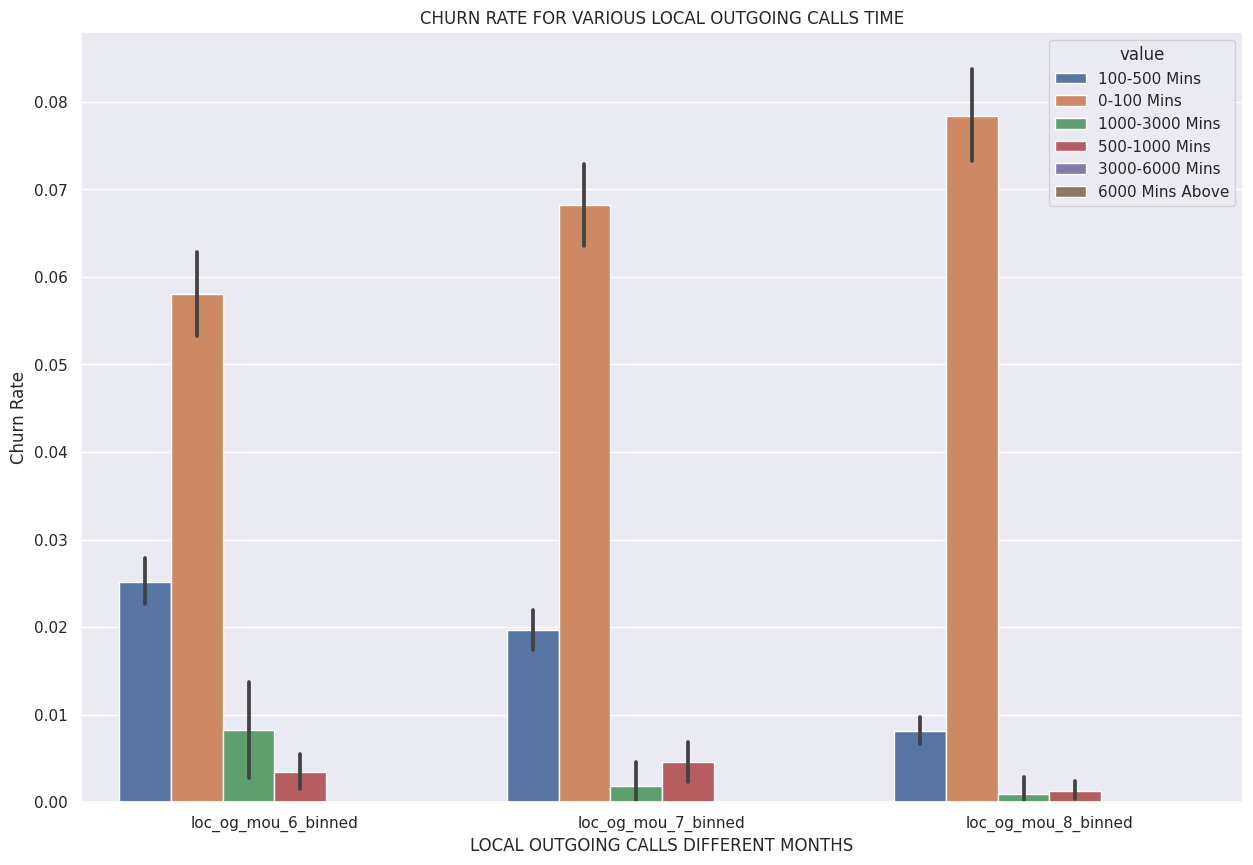

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS LOCAL OUTGOING CALLS TIME')
plt.xlabel('LOCAL OUTGOING CALLS DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

 **1. CONCLUSION:**

1.   The Customers doing Local Outgoing Calls from 0-100 Mins are most likely to Churn. 
2.   The Customers doing 500-3000 Mins LOC are least likely to CHurn.



In [ ]:
#LIST OF COLUMNS FOR STD OUTGOING CALLS
STD_COLS = [col for col in df.columns.to_list() if 'std_og_mou' in col]
STD_COLS

['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8']

In [ ]:
df[STD_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

std_og_mou_6  std_og_mou_7  std_og_mou_8
count  27422.000000  27422.000000  27422.000000
mean     380.121442    409.439061    363.867745
std      558.886464    598.017018    597.205741
min        0.000000      0.000000      0.000000
1%         0.000000      0.000000      0.000000
10%        0.000000      0.000000      0.000000
25%        6.615000      6.630000      3.550000
50%      127.960000    138.345000     88.735000
75%      561.907500    618.005000    509.540000
90%     1105.556000   1166.284000   1077.716000
95%     1510.809000   1593.334500   1523.859000
99%     2530.494300   2717.549500   2708.918200
max     5571.130000   6970.080000  13980.060000

In [ ]:
new_col1 = []

In [ ]:
bins = [-1,100,500,1000,2000,5000, 50000]
labels=['0-100 Mins', '100-500 Mins', '500-1000 Mins', '1000-2000 Mins', '2000-5000 Mins', '5000 Mins Above']

In [ ]:
for col in STD_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col1.append(col1)

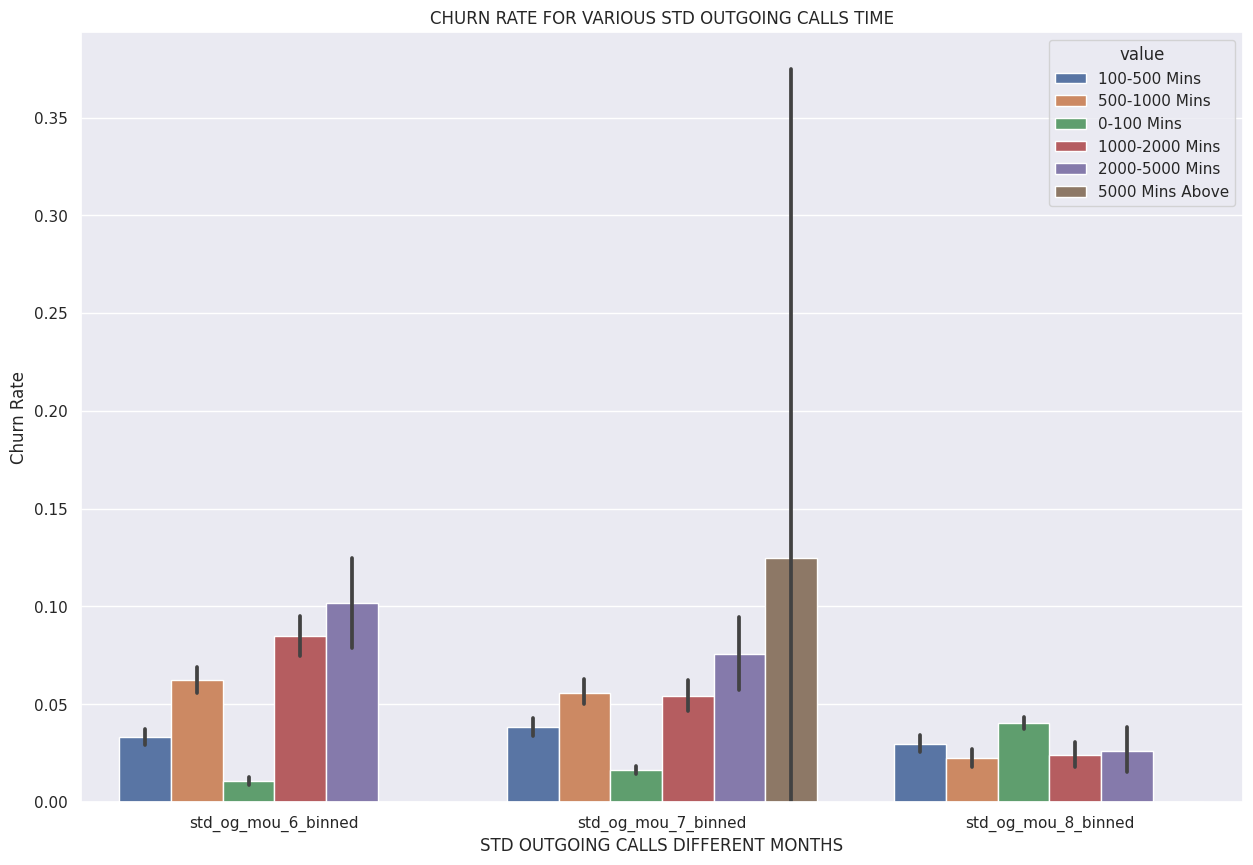

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col1, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS STD OUTGOING CALLS TIME')
plt.xlabel('STD OUTGOING CALLS DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

**2. CONCLUSION:**


1.   On average Customers with STD calls 0-100 Mins are Least likely to Churn
2.   On aveage Customers with STD calls 2000-5000 Mins are most likely to Churn.



In [ ]:
#LIST OF COLUMNS FOR ARPU
ARPU_COLS = [col for col in df.columns.to_list() if 'arpu' in col]
ARPU_COLS

['arpu_6', 'arpu_7', 'arpu_8']

In [ ]:
df[ARPU_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

arpu_6        arpu_7        arpu_8
count  27422.000000  27422.000000  27422.000000
mean     564.272677    574.437733    538.927564
std      306.644451    313.359936    360.352854
min    -2258.709000  -1289.715000   -345.129000
1%        59.634940     94.541680      0.756300
10%      276.834800    286.598300    188.555500
25%      365.188500    370.860500    313.925750
50%      491.908000    496.196000    465.948500
75%      688.885750    696.360500    678.246750
90%      957.040600    968.994100    969.991300
95%     1166.650100   1194.699350   1218.857800
99%     1639.781650   1673.289660   1776.919860
max     2755.181000   3598.161000   6255.086000

In [ ]:
bins = [-500, 0 , 500, 1000, 1500, 2000, 2700,60000]
labels = ['loss', '0-500', '500-1000', '1000-1500', '1500-2000', '2000-2700', '2700 ABOVE' ]

In [ ]:
new_col2 = []

In [ ]:
for col in ARPU_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col2.append(col1)

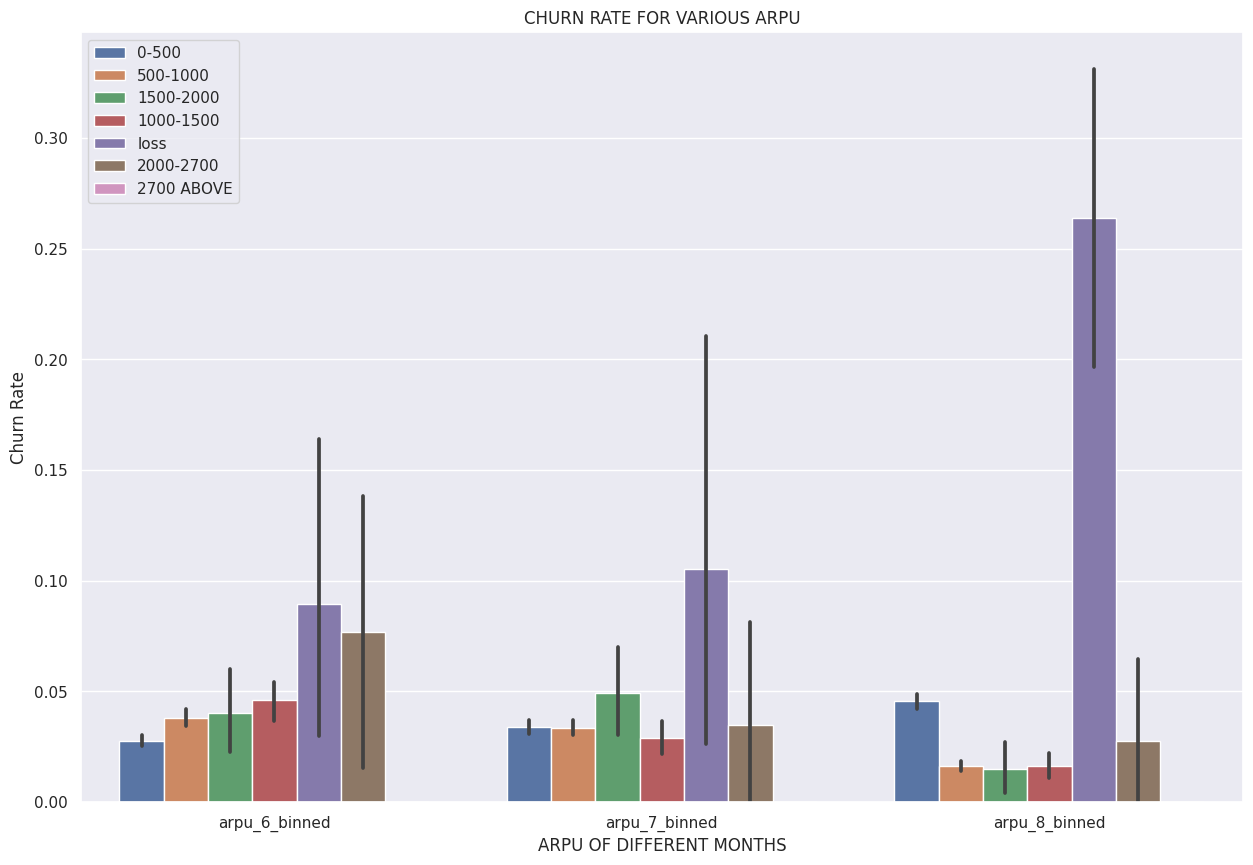

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col2, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS ARPU')
plt.xlabel('ARPU OF DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.legend(loc="upper left")
plt.show()

**3. CONCLUSION:**


1.   On average Customers from whom ARPU is Loss  are Most likely to Churn.

In [ ]:
#LIST OF COLUMNS FOR AMOUNT
amt_COLS = [col for col in df.columns.to_list() if 'total_rech_amt' in col]
amt_COLS

['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']

In [ ]:
df[amt_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8
count      27422.000000      27422.000000      27422.000000
mean         668.997812        678.482788        619.352564
std          370.738992        384.010953        439.704496
min            0.000000          0.000000          0.000000
1%            20.000000          0.000000          0.000000
10%          326.000000        328.000000        166.000000
25%          433.000000        435.000000        342.000000
50%          580.000000        586.000000        537.000000
75%          820.000000        829.000000        799.000000
90%         1134.000000       1156.000000       1141.900000
95%         1380.000000       1440.000000       1444.000000
99%         1981.790000       2029.370000       2106.790000
max         4255.000000       4302.000000       7443.000000

In [ ]:
bins = [-10, 500, 1000, 1500, 2000, 4000,40000 ]
labels = [ '0-500', '500-1000', '1000-1500', '1500-2000', '2000-4000','4000 ABOVE' ]

In [ ]:
new_col3 = []

In [ ]:
for col in amt_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col3.append(col1)

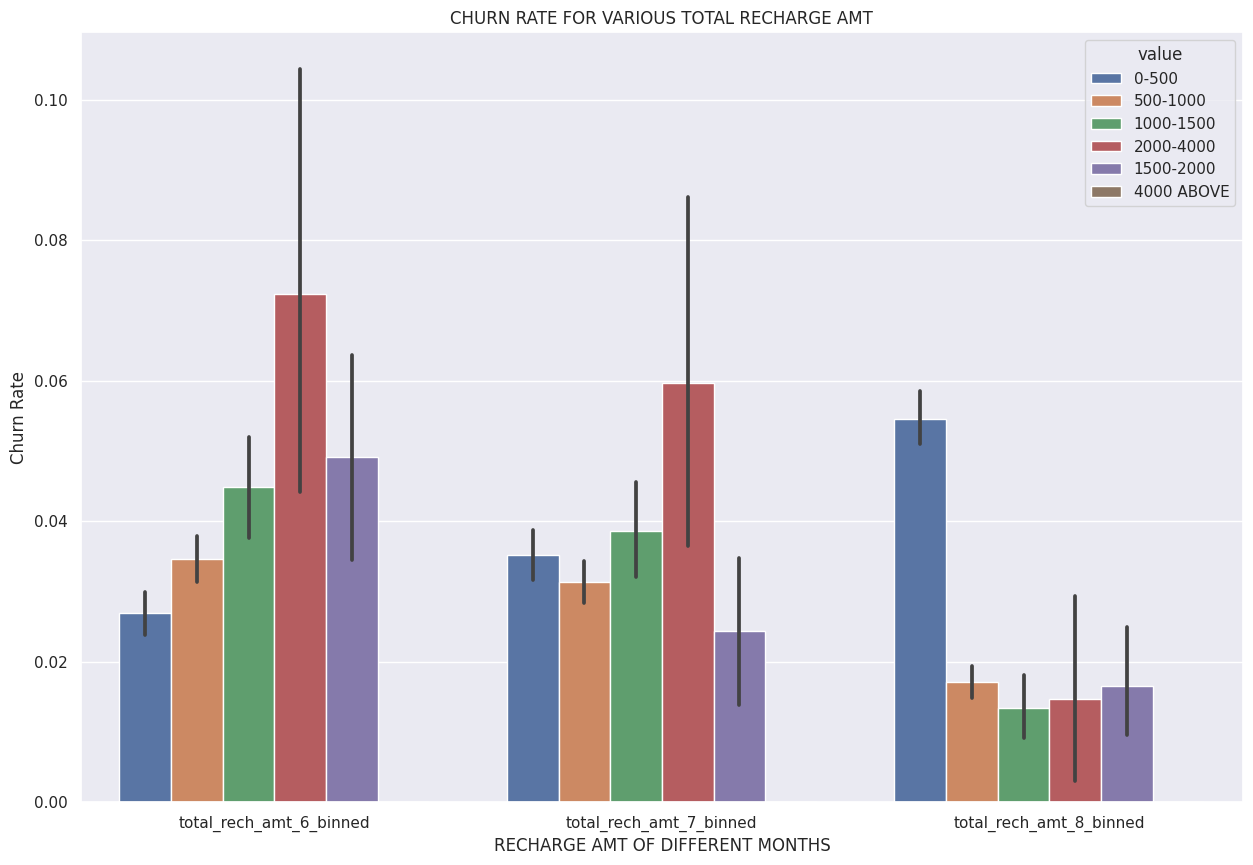

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col3, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS TOTAL RECHARGE AMT')
plt.xlabel('RECHARGE AMT OF DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

**4. CONCLUSION:**


1.   On average Customers doing Recharge of amount 2000-4000 are Most likely to Churn.

In [ ]:
#LIST OF COLUMNS FOR 2G 
data_2g_COLS = [col for col in df.columns.to_list() if 'vol_2g_mb' in col]
data_2g_COLS

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']

In [ ]:
df[data_2g_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

vol_2g_mb_6   vol_2g_mb_7   vol_2g_mb_8
count  27422.000000  27422.000000  27422.000000
mean      79.730236     79.827948     72.537991
std      277.941272    283.771487    274.725338
min        0.000000      0.000000      0.000000
1%         0.000000      0.000000      0.000000
10%        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%       14.815000     16.170000     12.170000
90%      203.130000    202.037000    165.420000
95%      493.614500    477.948500    432.641500
99%     1325.283700   1356.391200   1288.373800
max    10285.900000   7873.550000  11117.610000

In [ ]:
bins = [-1, 20,100,200,400,1200, 120000]
labels = ['0-20 MB', '20-100 MB', '100-200 MB', '200-400 MB', '400-1200 MB', '1200 MB above']

In [ ]:
new_col4 = []

In [ ]:
for col in data_2g_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col4.append(col1)

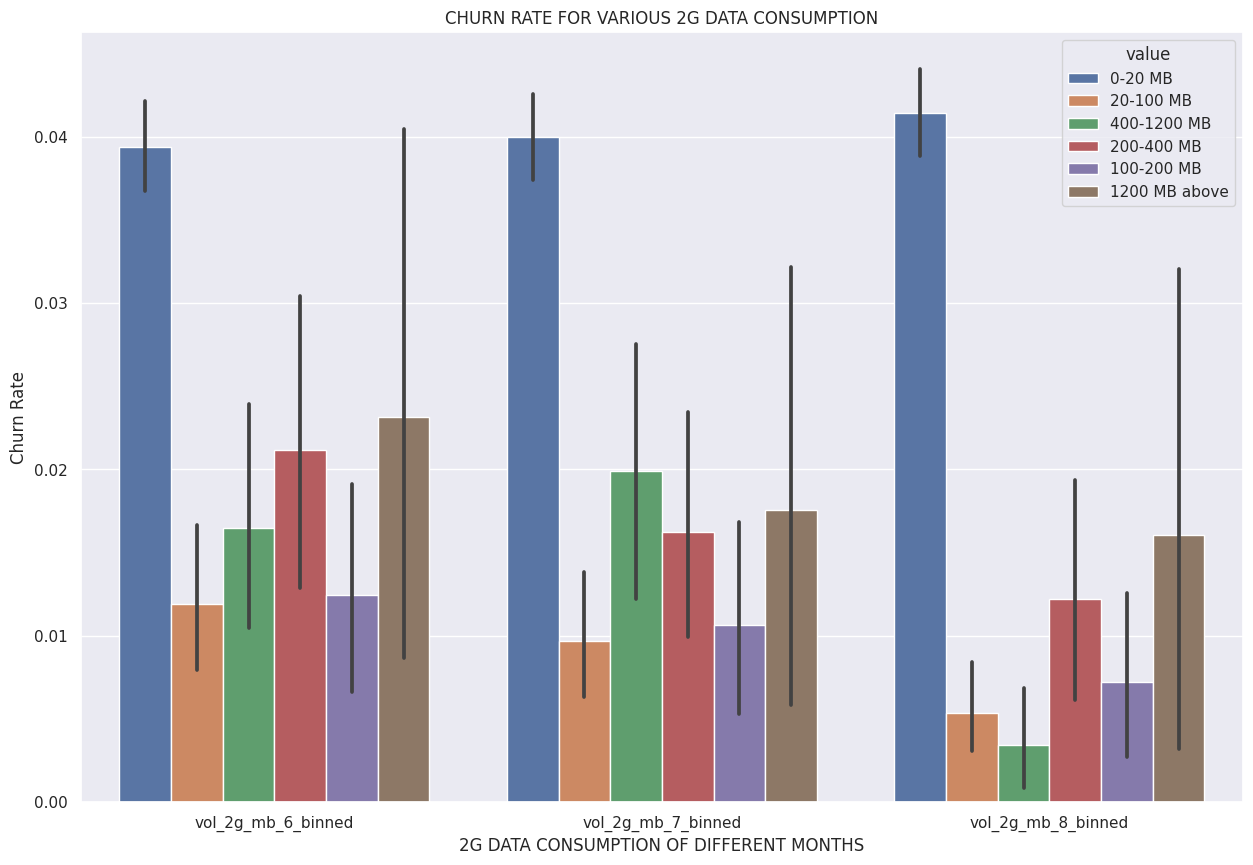

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col4, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS 2G DATA CONSUMPTION')
plt.xlabel('2G DATA CONSUMPTION OF DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

**5. CONCLUSION:**


1.   On average Customers using 0-20 MB of 2G data are Most likely to Churn.
2.   On average Customers uising 20-100 MB of 2G data are least likely to Churn.

In [ ]:
#LIST OF COLUMNS FOR 3G DATA
data_3g_COLS = [col for col in df.columns.to_list() if 'vol_3g_' in col]
data_3g_COLS

['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']

In [ ]:
df[data_3g_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

vol_3g_mb_6   vol_3g_mb_7   vol_3g_mb_8
count  27422.000000  27422.000000  27422.000000
mean     235.450080    259.210049    260.955091
std      711.253899    743.972956    771.789664
min        0.000000      0.000000      0.000000
1%         0.000000      0.000000      0.000000
10%        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        0.000000      2.500000      0.230000
90%      845.038000    933.391000    919.394000
95%     1420.827500   1540.995000   1515.246000
99%     3171.998100   3328.873000   3442.489500
max    19876.780000  22613.100000  29651.830000

In [ ]:
bins = [-1, 500, 1500, 3000, 10000, 18000,180000]
labels = ['0-500 MB', '500-1500 MB', '1500-3000 MB', '3000-10000 MB', '10000-18000 MB', '18000 MB and ABOVE']

In [ ]:
new_col5 = []

In [ ]:
for col in data_3g_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col5.append(col1)

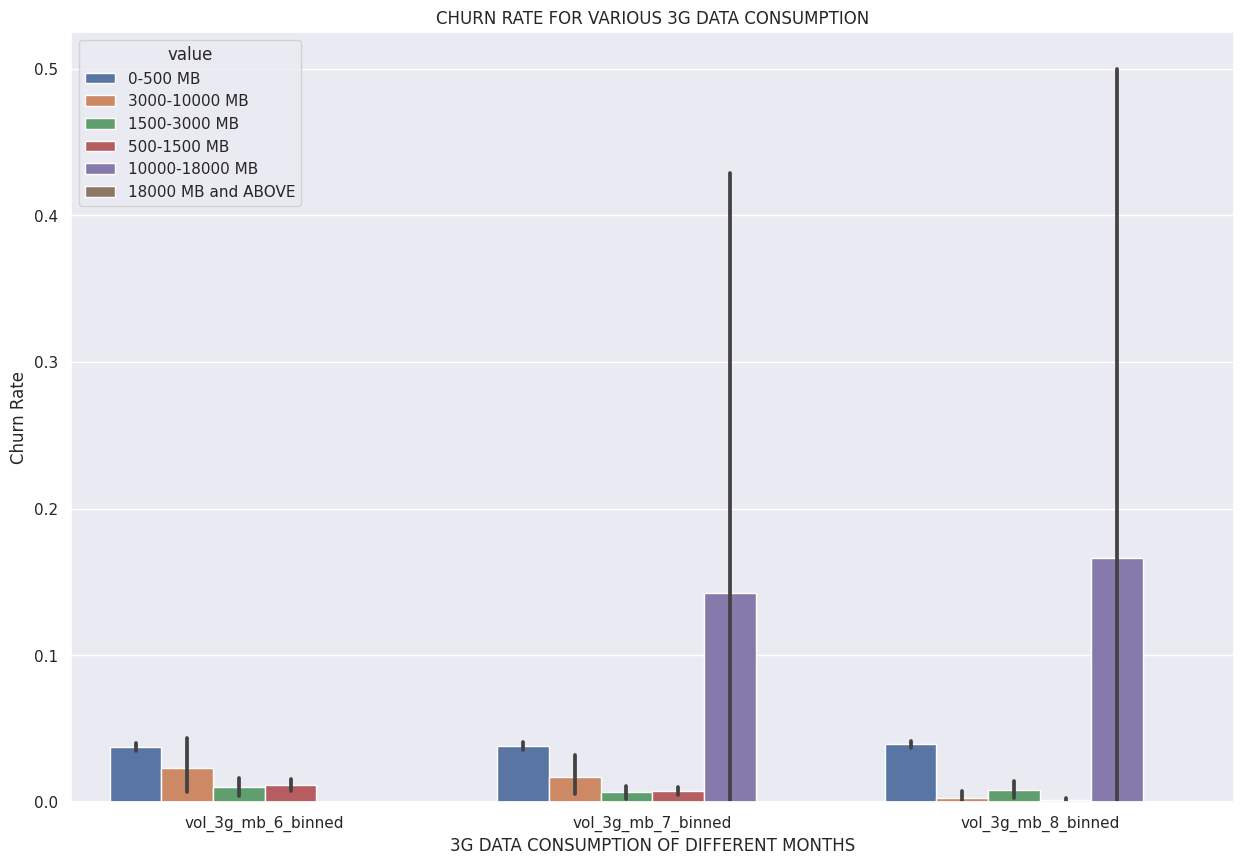

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col5, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS 3G DATA CONSUMPTION')
plt.xlabel('3G DATA CONSUMPTION OF DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

**6. CONCLUSION:**


1.   On average Customers using 10000-18000 MB of 3G data are Most likely to Churn.
2.   On average Customers uising 0-500 MB of 3G data are second most likely to Churn.

In [ ]:
#LIST OF COLUMNS FOR 3G DATA PAID PER VOLUME
vdata_3g_COLS = [col for col in df.columns.to_list() if 'vbc_3g' in col]
vdata_3g_COLS

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [ ]:
df[vdata_3g_COLS].describe(percentiles=[.01, .1, .25, .5, .75, .90, .95, .99])

aug_vbc_3g    jul_vbc_3g    jun_vbc_3g
count  27422.000000  27422.000000  27422.000000
mean     129.760137    131.703231    116.015616
std      381.558787    388.399476    361.121241
min        0.000000      0.000000      0.000000
1%         0.000000      0.000000      0.000000
10%        0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000
75%        6.910000      1.905000      0.000000
90%      449.131000    452.928000    385.887000
95%      823.631500    832.176500    736.409500
99%     1755.017000   1857.457600   1764.117000
max    12916.220000   9165.600000   7581.250000

In [ ]:
bins = [-1, 500, 1500, 3000, 5000, 7000,70000]
labels = ['0-500', '500-1500', '1500-3000', '3000-5000', '5000-7000', '7000 and ABOVE']

In [ ]:
new_col6 = []

In [ ]:
for col in vdata_3g_COLS:
  col1 = str(col)+'_binned'
  df[col1] = pd.cut(df[col], bins=bins, labels=labels)
  new_col6.append(col1)

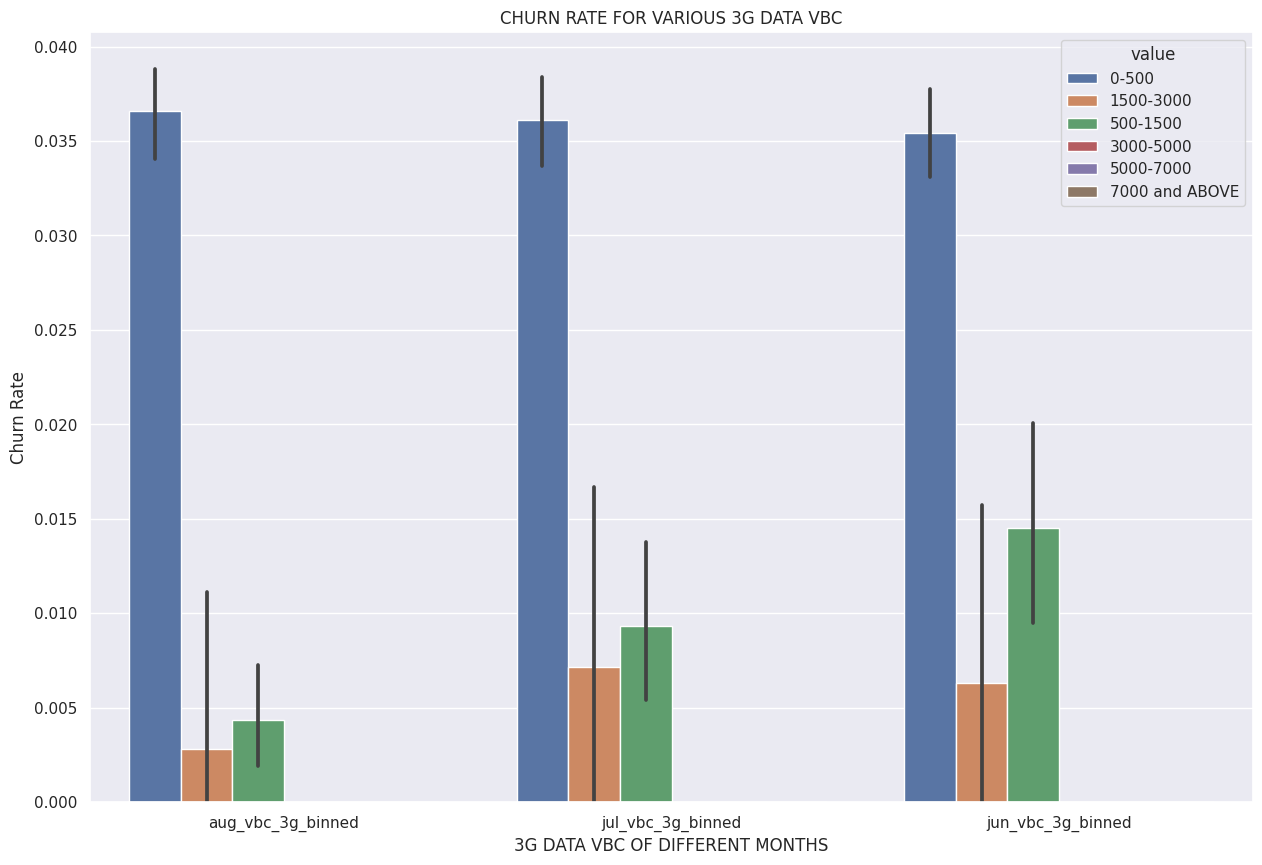

In [ ]:
# melt the dataframe to create a long-form dataframe for plotting
df_melt = pd.melt(df, id_vars='churn', value_vars=new_col6, var_name='columns')
# create the bar plot using seaborn
plt.figure(figsize=(15, 10))
sns.barplot(x='columns', y='churn', hue='value', data=df_melt, estimator='mean')
plt.title('CHURN RATE FOR VARIOUS 3G DATA VBC')
plt.xlabel('3G DATA VBC OF DIFFERENT MONTHS')
plt.ylabel('Churn Rate')
plt.show()

**7. CONCLUSION:**


1.   On average Customers using 0-500 VBC 3G data are Most likely to Churn.


In [ ]:
new_cols = new_col + new_col1 + new_col2 + new_col3 + new_col4 + new_col5 + new_col6
new_cols

['loc_og_mou_6_binned',
 'loc_og_mou_7_binned',
 'loc_og_mou_8_binned',
 'std_og_mou_6_binned',
 'std_og_mou_7_binned',
 'std_og_mou_8_binned',
 'arpu_6_binned',
 'arpu_7_binned',
 'arpu_8_binned',
 'total_rech_amt_6_binned',
 'total_rech_amt_7_binned',
 'total_rech_amt_8_binned',
 'vol_2g_mb_6_binned',
 'vol_2g_mb_7_binned',
 'vol_2g_mb_8_binned',
 'vol_3g_mb_6_binned',
 'vol_3g_mb_7_binned',
 'vol_3g_mb_8_binned',
 'aug_vbc_3g_binned',
 'jul_vbc_3g_binned',
 'jun_vbc_3g_binned']

In [ ]:
sns.set(font_scale=2.5)
x=1
for i in new_cols[:-1]:
  for j in new_cols[x:]:
    if i!=j:
      m=len(pd.unique(df[i]))
      n=len(pd.unique(df[j]))
      if n>=m:
        ix=i
        cx=j
      else:
        ix=j
        cx=i
      #dmean=a_data.groupby([i,j],as_index=False)["TARGET"].mean()
      rslt=pd.pivot_table(data=df, index=ix,columns=cx,values="churn",aggfunc='mean')
      titel='Good Clients of different '+ ix + '  for different  ' + cx+ '\n'
      plt.figure(figsize=[30,10])
      sns.heatmap(rslt,annot=True,cmap="RdYlGn",center=0.5,annot_kws={"fontsize":12}).set(title=titel)
      plt.show()

      txta='\n' + 'CONCLUSIONS OF '+titel[:-1]+ ': \n'
      print('\n',"CONCLUSIONS OF " , titel[:-1], ": \n")
      print("A. The following combinations of Client charachterics are not likely/least to default: \n")
      c=1
      for p in rslt.index:
        for q in rslt.columns:
          if rslt[q][p]==1:
            print(c,". ",p," and ",q)
            
            c+=1
      
      if c==1:
        for p in rslt.index:
          for q in rslt.columns:
            if len(str(rslt[q][p]))>0 and rslt[q][p]>0.95 and rslt[q][p]>=rslt.quantile(0.99).max():
              print(c,". ",p," and ",q)
            
              c+=1

      print("\n", "B. The following combinations of Client charachterics are most likely to default: \n")
      c=1
      for p in rslt.index:
        for q in rslt.columns:
          if rslt[q][p]==0:
            print(c,". ",p," and ",q)
            c+=1
      
      if c==1:
        for p in rslt.index:
          for q in rslt.columns:
            if len(str(rslt[q][p]))>0 and rslt[q][p]<0.1 and rslt[q][p]<rslt.quantile(0.01).min():
              print(c,". ",p," and ",q)

              c+=1  
      print("\n","\n")
  x+=1


**8. CONCLUSION:**


1.   Customers using 0-100 Mins LOCAL calls and 10000-18000 MB of 3G data are Highly likely to Churn at 40% average.
2.   Similarly for Customers using 0-100 Mins STDL calls and 10000-18000 MB of 3G data are Highly likely to Churn at 33% average.
3.   Customers on whom ARPU is loss and doing STD calls of 2000-2500 Mins are most likely to Churn at average 75%.
4.   Those from whom ARPU suddenlu changed from Loss to 2000-2700 are most likely to Churn.
5.  Those with ARPU in range of 1500-2000 and using 10000-18000 MBV of 3G data are Most likely to Churn.
6. Those who's 3G data consumption increase from 3000-10000 to 10000-18000 MB are ost likely to Churn.

In [ ]:
df.head()

mobile_number   arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  \
8   7001524846.0  378.721  492.223  137.362       413.69       351.03   
13  7002191713.0  492.846  205.671  593.260       501.76       108.39   
16  7000875565.0  430.975  299.869  187.894        50.51        74.01   
17  7000187447.0  690.008   18.980   25.499      1185.91         9.28   
21  7002124215.0  514.453  597.753  637.760       102.41       132.11   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   
21        85.14        757.93        896.68        983.39           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               

In [ ]:
new_cols = new_cols+['avg_amt_good_phase']

In [ ]:
df.shape

(27422, 126)

In [ ]:
df = df.drop(columns=new_cols)

In [ ]:
df.shape

(27422, 126)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27422 entries, 8 to 11101
Columns: 126 entries, mobile_number to churn
dtypes: float64(124), int64(1), object(1)
memory usage: 26.6+ MB


### Step 4: Test-Train Split

In [1160]:
from sklearn.model_selection import train_test_split

In [1161]:
# Putting feature variable to X
X = df.drop(['churn','mobile_number'], axis=1)

X.head()

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
8   378.721  492.223  137.362       413.69       351.03        35.08   
13  492.846  205.671  593.260       501.76       108.39       534.24   
16  430.975  299.869  187.894        50.51        74.01        70.61   
17  690.008   18.980   25.499      1185.91         9.28         7.79   
21  514.453  597.753  637.760       102.41       132.11        85.14   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
8          94.66         80.63        136.48           0.00           0.00   
13        413.31        119.28        482.46          23.53         144.24   
16        296.29        229.74        162.76           0.00           2.83   
17         61.64          0.00          5.54           0.00           4.76   
21        757.93        896.68        983.39           0.00           0.00   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
8            0.00           0.00           0.00           0.00   
13          72.11           7.98          35.26           1.44   
16           0.00           0.00          17.74           0.00   
17           4.81           0.00           8.46          13.34   
21           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   
21              4.48              6.16             23.34             91.81   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   
21             87.93            104.81              0.75              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   
21              1.58               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   
21         97.04         94.09        129.74             97.93   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   
21            125.94             61.79            665.36            808.74   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
8              75.69               0.0               0.0               0.0   
13            156.94               0.0               0.0               0.0   
16             18.29               0.0               0.0               0.0   
17              0.00               0.0               0.0               0.0   
21            876.99               0.0     

In [1162]:
# Putting response variable to y
y = df['churn']

y.head()

8     0
13    0
16    0
17    0
21    0
Name: churn, dtype: int64

In [1163]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [ ]:
cont_num_cols.remove('avg_amt_good_phase')

In [1165]:
from scipy.stats import shapiro

stat, p = shapiro(df[cont_num_cols])

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


AS DISTRIBUTION OF DATA isn't GAUSSIAN , HENCE WE USE MINMAX SCALER

In [1166]:
from sklearn.preprocessing import MinMaxScaler

In [1167]:
scaler = MinMaxScaler()

X_train[cont_num_cols] = scaler.fit_transform(X_train[cont_num_cols])

X_train.head()

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4104   552.314   785.231  693.084       786.98       627.34       552.38   
16868  690.712  1179.380  499.025       403.31       534.26       349.13   
14079  438.249   535.123  667.711       167.04       227.43       182.28   
3323   856.452  1204.131  657.560      1736.53      1655.66      1116.78   
10641  212.272   312.729  363.107        88.14       202.01       182.69   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4104         341.16       1046.78       1017.16       0.000000       0.000000   
16868        213.71        414.83        330.14       0.003765       0.031485   
14079        206.34        247.86        627.01       0.000000       0.000000   
3323         295.74        294.68        238.01       0.000000       0.000000   
10641        211.98        471.49        383.29       0.000000       0.000000   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4104        0.000000       0.000000       0.000000         0.0000   
16868       0.000000       0.019394       0.187484         0.0000   
14079       0.000000       0.000000       0.000000         0.0000   
3323        0.003317       0.000000       0.000000         0.0369   
10641       0.000000       0.000532       0.000000         0.0000   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
4104               2.13             24.86             25.64              1.93   
16868            317.39            281.78            345.03            171.06   
14079            167.04            227.43            182.28            196.48   
3323              11.46              6.29             26.43             87.43   
10641              0.00              1.65              7.39              4.48   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
4104               2.99              0.91              0.00              0.00   
16868            212.66            294.24             15.06              6.13   
14079            240.89            621.23              6.34              3.61   
3323              91.66            111.36              0.46              0.48   
10641             13.53             11.74              0.00              0.00   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
4104           0.000000          0.015546          0.000000          0.002242   
16868          0.014303          0.000000          0.000000          0.000000   
14079          0.003436          0.000000          0.000000          0.000000   
3323           0.000000          0.010208          0.000000          0.000000   
10641          0.000000          0.002421          0.002834          0.004714   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
4104           4.06         27.86      0.003467          0.170285   
16868        503.53        500.58      0.085176          0.009468   
14079        369.88        471.94      0.105297          0.000000   
3323          99.36         98.44      0.017985          0.374282   
10641          4.48         15.18      0.002498          0.019124   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
4104             602.48          0.081036          0.075628           1041.84   
16868              9.81          0.000629          0.004088             65.33   
14079              0.00          0.000000          0.000797              3.34   
3323            1649.36          0.155872          0.046775            202.53   
10641            200.36          0.026968          0.046675            456.66   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
4104            1010.56          0.000000              0.00          0.000000   
16868             22.61          0.015241             17.13          0.000000   
14079              2.30          0.000000  

In [1168]:
### Checking the Churn Rate
Churn = (sum(df['churn'])/len(df['churn'].index))*100
Churn

3.362263875720225

We have almost 3.36% churn rate

### Step 6: Looking at Correlations

#### Dropping highly correlated dummy variables

In [1169]:
corr_matrix = df.corr()

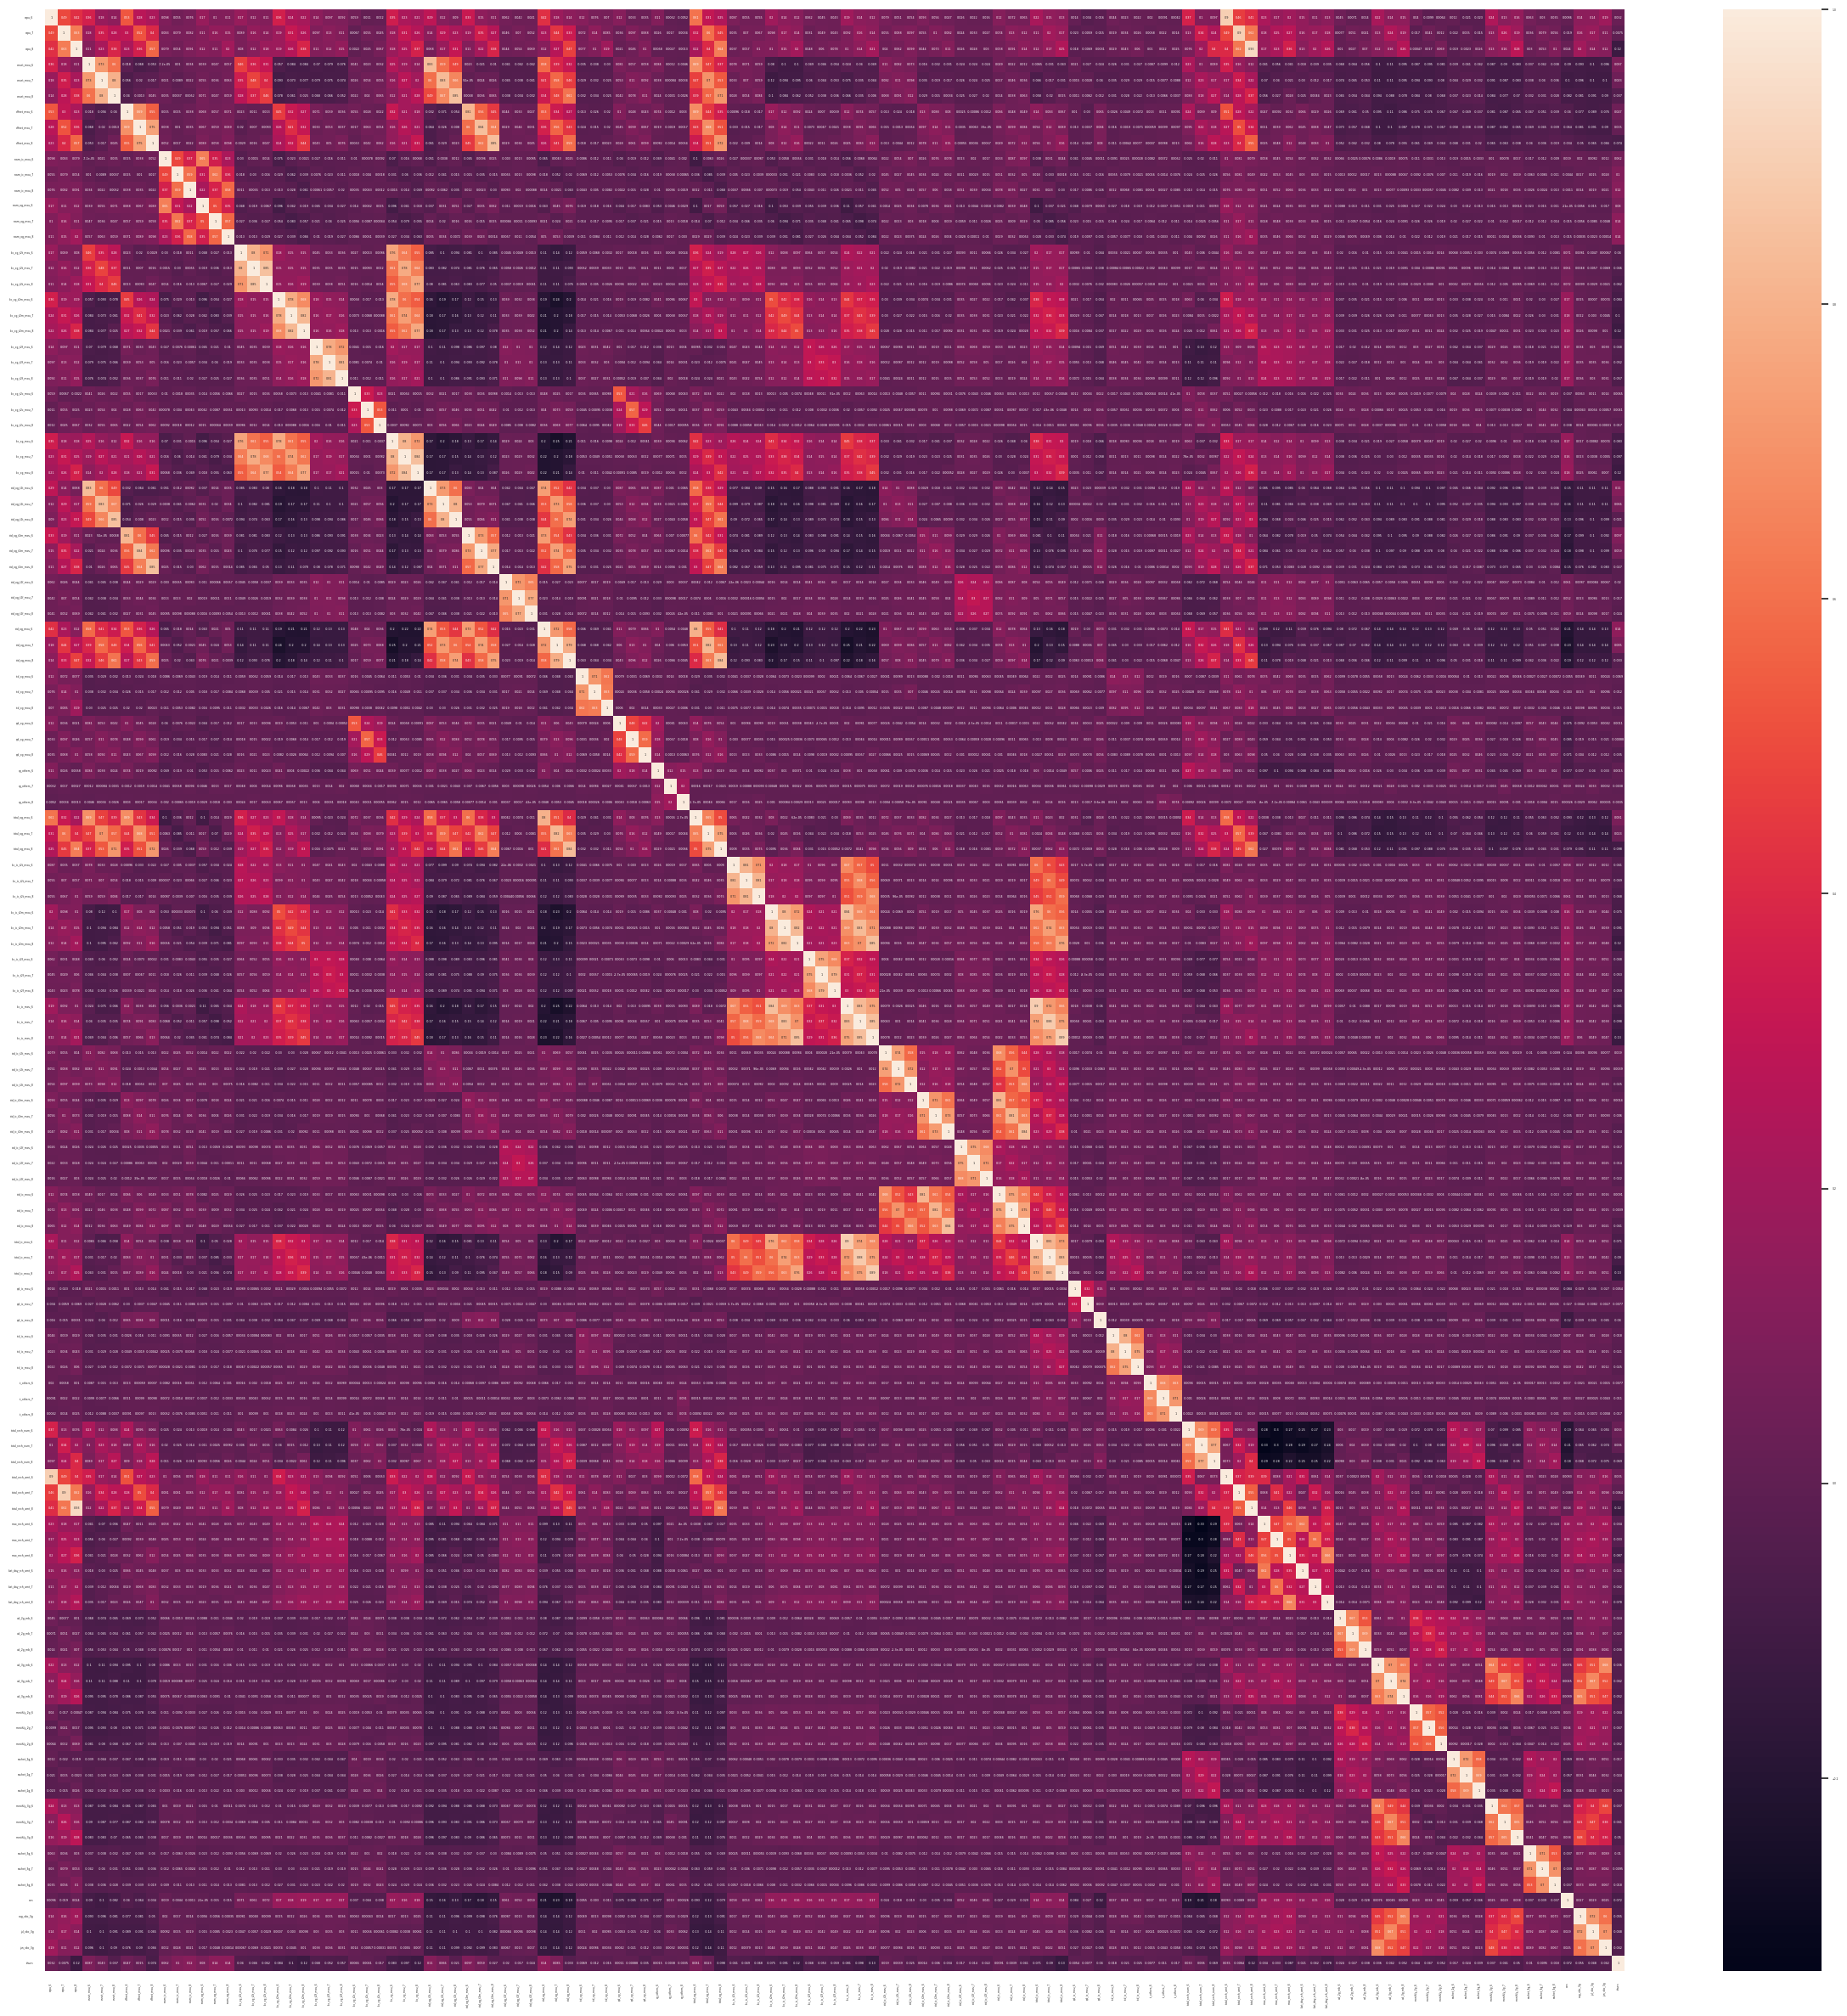

In [1170]:
# Let's see the correlation matrix 
sns.set(font_scale=0.2)
plt.figure(figsize = (30,30))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [1171]:
corr_matrix

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6       1.000000  0.491542  0.419329     0.361847     0.175519   
arpu_7       0.491542  1.000000  0.630985     0.179018     0.350051   
arpu_8       0.419329  0.630985  1.000000     0.113974     0.225038   
onnet_mou_6  0.361847  0.179018  0.113974     1.000000     0.729098   
onnet_mou_7  0.175519  0.350051  0.225038     0.729098     1.000000   
...               ...       ...       ...          ...          ...   
aon          0.008590 -0.019026  0.024271    -0.090146    -0.104090   
aug_vbc_3g   0.136934  0.158434  0.201900    -0.093355    -0.095876   
jul_vbc_3g   0.140654  0.174339  0.136157    -0.101801    -0.102563   
jun_vbc_3g   0.189272  0.112732  0.116401    -0.095543    -0.104570   
churn        0.031919 -0.007489 -0.118688     0.086924     0.043390   

             onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
arpu_6          0.143028      0.530735      0.276851      0.234574   
arpu_7          0.282612      0.302955      0.519331      0.396096   
arpu_8          0.384308      0.226955      0.359245      0.573282   
onnet_mou_6     0.600100     -0.017504     -0.067990     -0.053258   
onnet_mou_7     0.801709     -0.056459     -0.020149     -0.016651   
...                  ...           ...           ...           ...   
aon            -0.081543     -0.039925     -0.064220     -0.034078   
aug_vbc_3g     -0.081268     -0.077083     -0.080681     -0.050397   
jul_vbc_3g     -0.090903     -0.088628     -0.091422     -0.065125   
jun_vbc_3g     -0.089928     -0.076440     -0.090351     -0.065663   
churn          -0.037367      0.046762      0.015420     -0.073736   

             roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
arpu_6            0.098198       0.055222       0.075757       0.172959   
arpu_7            0.082502       0.078730       0.082404       0.110985   
arpu_8            0.078940       0.054349       0.090563       0.117629   
onnet_mou_6      -0.000072       0.010190       0.033987       0.038857   
onnet_mou_7       0.021247      -0.008927       0.022244       0.054623   
...                    ...            ...            ...            ...   
aon               0.018616      -0.004406      -0.001071       0.000021   
aug_vbc_3g        0.019659       0.016545       0.014076      -0.005604   
jul_vbc_3g        0.008215       0.014648       0.018513      -0.015277   
jun_vbc_3g        0.011648       0.027952       0.020988      -0.016802   
churn             0.062300       0.102991       0.121798       0.080181   

             roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
arpu_6            0.102816       0.110727          0.168505          0.116222   
arpu_7            0.156602       0.148841          0.088989          0.162833   
arpu_8            0.106864       0.199341          0.079950          0.119146   
onnet_mou_6       0.046609       0.057171          0.464134          0.361019   
onnet_mou_7       0.035856       0.062548          0.349292          0.476898   
...                    ...            ...               ...               ...   
aon              -0.015267      -0.014805          0.070764          0.060729   
aug_vbc_3g       -0.005609      -0.000351          0.008121          0.004828   
jul_vbc_3g       -0.008452      -0.002340         -0.004652         -0.005708   
jun_vbc_3g       -0.004769      -0.000137          0.000666         -0.006937   
churn             0.141575       0.138092         -0.039898         -0.046465   

             loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
arpu_6               0.108146          0.357710          0.236636   
arpu_7               0.135221          0.187667          0.314270   
arpu_8               0.182472          0.187220          0.259370   
onnet_mou_6          0.312857         -0.056732         -0.084488   
onnet_mou_7          0.395345         -0.093471         -0.073307   
...                       ...    

In [1172]:
corr_matrix.max().quantile(0.9)

1.0

In [1173]:
corr_matrix.min().min()

-0.3310594040997533

HENCE WE ONLY DEAL WITH HIGHLY POSITIVE CORRELATED  VALUES

In [1174]:
threshold = 0.75

rows, cols = np.where((np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) < 1.0))

# extract column and row names
# extract column and row names
corr_vars = []
for i in range(len(rows)):
    col_i = corr_matrix.columns[cols[i]]
    row_i = corr_matrix.index[rows[i]]
    # check if tuple is already in the list
    if (row_i, col_i) not in corr_vars and (col_i, row_i) not in corr_vars:
        corr_vars.append((row_i, col_i))

# print column and row names
corr_vars

[('arpu_6', 'total_rech_amt_6'),
 ('arpu_7', 'total_rech_amt_7'),
 ('arpu_8', 'total_rech_amt_8'),
 ('onnet_mou_6', 'std_og_t2t_mou_6'),
 ('onnet_mou_7', 'onnet_mou_8'),
 ('onnet_mou_7', 'std_og_t2t_mou_7'),
 ('onnet_mou_8', 'std_og_t2t_mou_8'),
 ('offnet_mou_6', 'std_og_t2m_mou_6'),
 ('offnet_mou_7', 'offnet_mou_8'),
 ('offnet_mou_7', 'std_og_t2m_mou_7'),
 ('offnet_mou_8', 'std_og_t2m_mou_8'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7'),
 ('loc_og_t2t_mou_6', 'loc_og_mou_6'),
 ('loc_og_t2t_mou_7', 'loc_og_t2t_mou_8'),
 ('loc_og_t2t_mou_7', 'loc_og_mou_7'),
 ('loc_og_t2t_mou_8', 'loc_og_mou_8'),
 ('loc_og_t2m_mou_6', 'loc_og_t2m_mou_7'),
 ('loc_og_t2m_mou_6', 'loc_og_mou_6'),
 ('loc_og_t2m_mou_7', 'loc_og_t2m_mou_8'),
 ('loc_og_t2m_mou_8', 'loc_og_mou_8'),
 ('loc_og_t2f_mou_6', 'loc_og_t2f_mou_7'),
 ('loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'),
 ('loc_og_mou_6', 'loc_og_mou_7'),
 ('loc_og_mou_7', 'loc_og_mou_8'),
 ('std_og_t2t_mou_7', 'std_og_t2t_mou_8'),
 ('std_og_t2m_mou_7', 'std_og_t2m_mo

In [1175]:
#LET US DROP ONE OF THE HIGHLY RELATED COLUMNS in each tuple
#col_drop = ['arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6', 'offnet_mou_7','offnet_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7' , 'loc_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8' ]
col_drop = list(set([t[0] for t in corr_vars]))
col_drop



['arpu_8',
 'offnet_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_7',
 'loc_og_mou_6',
 'loc_og_t2m_mou_7',
 'total_ic_mou_6',
 'loc_ic_t2m_mou_6',
 'total_rech_num_7',
 'std_og_t2m_mou_8',
 'loc_og_t2m_mou_8',
 'std_og_mou_8',
 'loc_ic_t2t_mou_6',
 'isd_ic_mou_7',
 'std_ic_mou_7',
 'std_ic_t2m_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'std_og_mou_7',
 'loc_ic_mou_8',
 'std_og_mou_6',
 'total_ic_mou_7',
 'isd_ic_mou_6',
 'onnet_mou_6',
 'std_og_t2f_mou_7',
 'loc_ic_t2t_mou_7',
 'arpu_7',
 'onnet_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_og_t2t_mou_6',
 'loc_ic_mou_6',
 'std_ic_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'std_ic_mou_6',
 'loc_og_t2m_mou_6',
 'std_ic_t2m_mou_8',
 'std_og_t2m_mou_7',
 'std_og_t2t_mou_7',
 'loc_og_t2t_mou_7',
 'offnet_mou_8',
 'loc_ic_mou_7',
 'loc_og_mou_7',
 'loc_og_t2t_mou_8',
 'arpu_6']

In [1176]:
X_test = X_test.drop(columns=col_drop)
X_train = X_train.drop(columns=col_drop)


#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

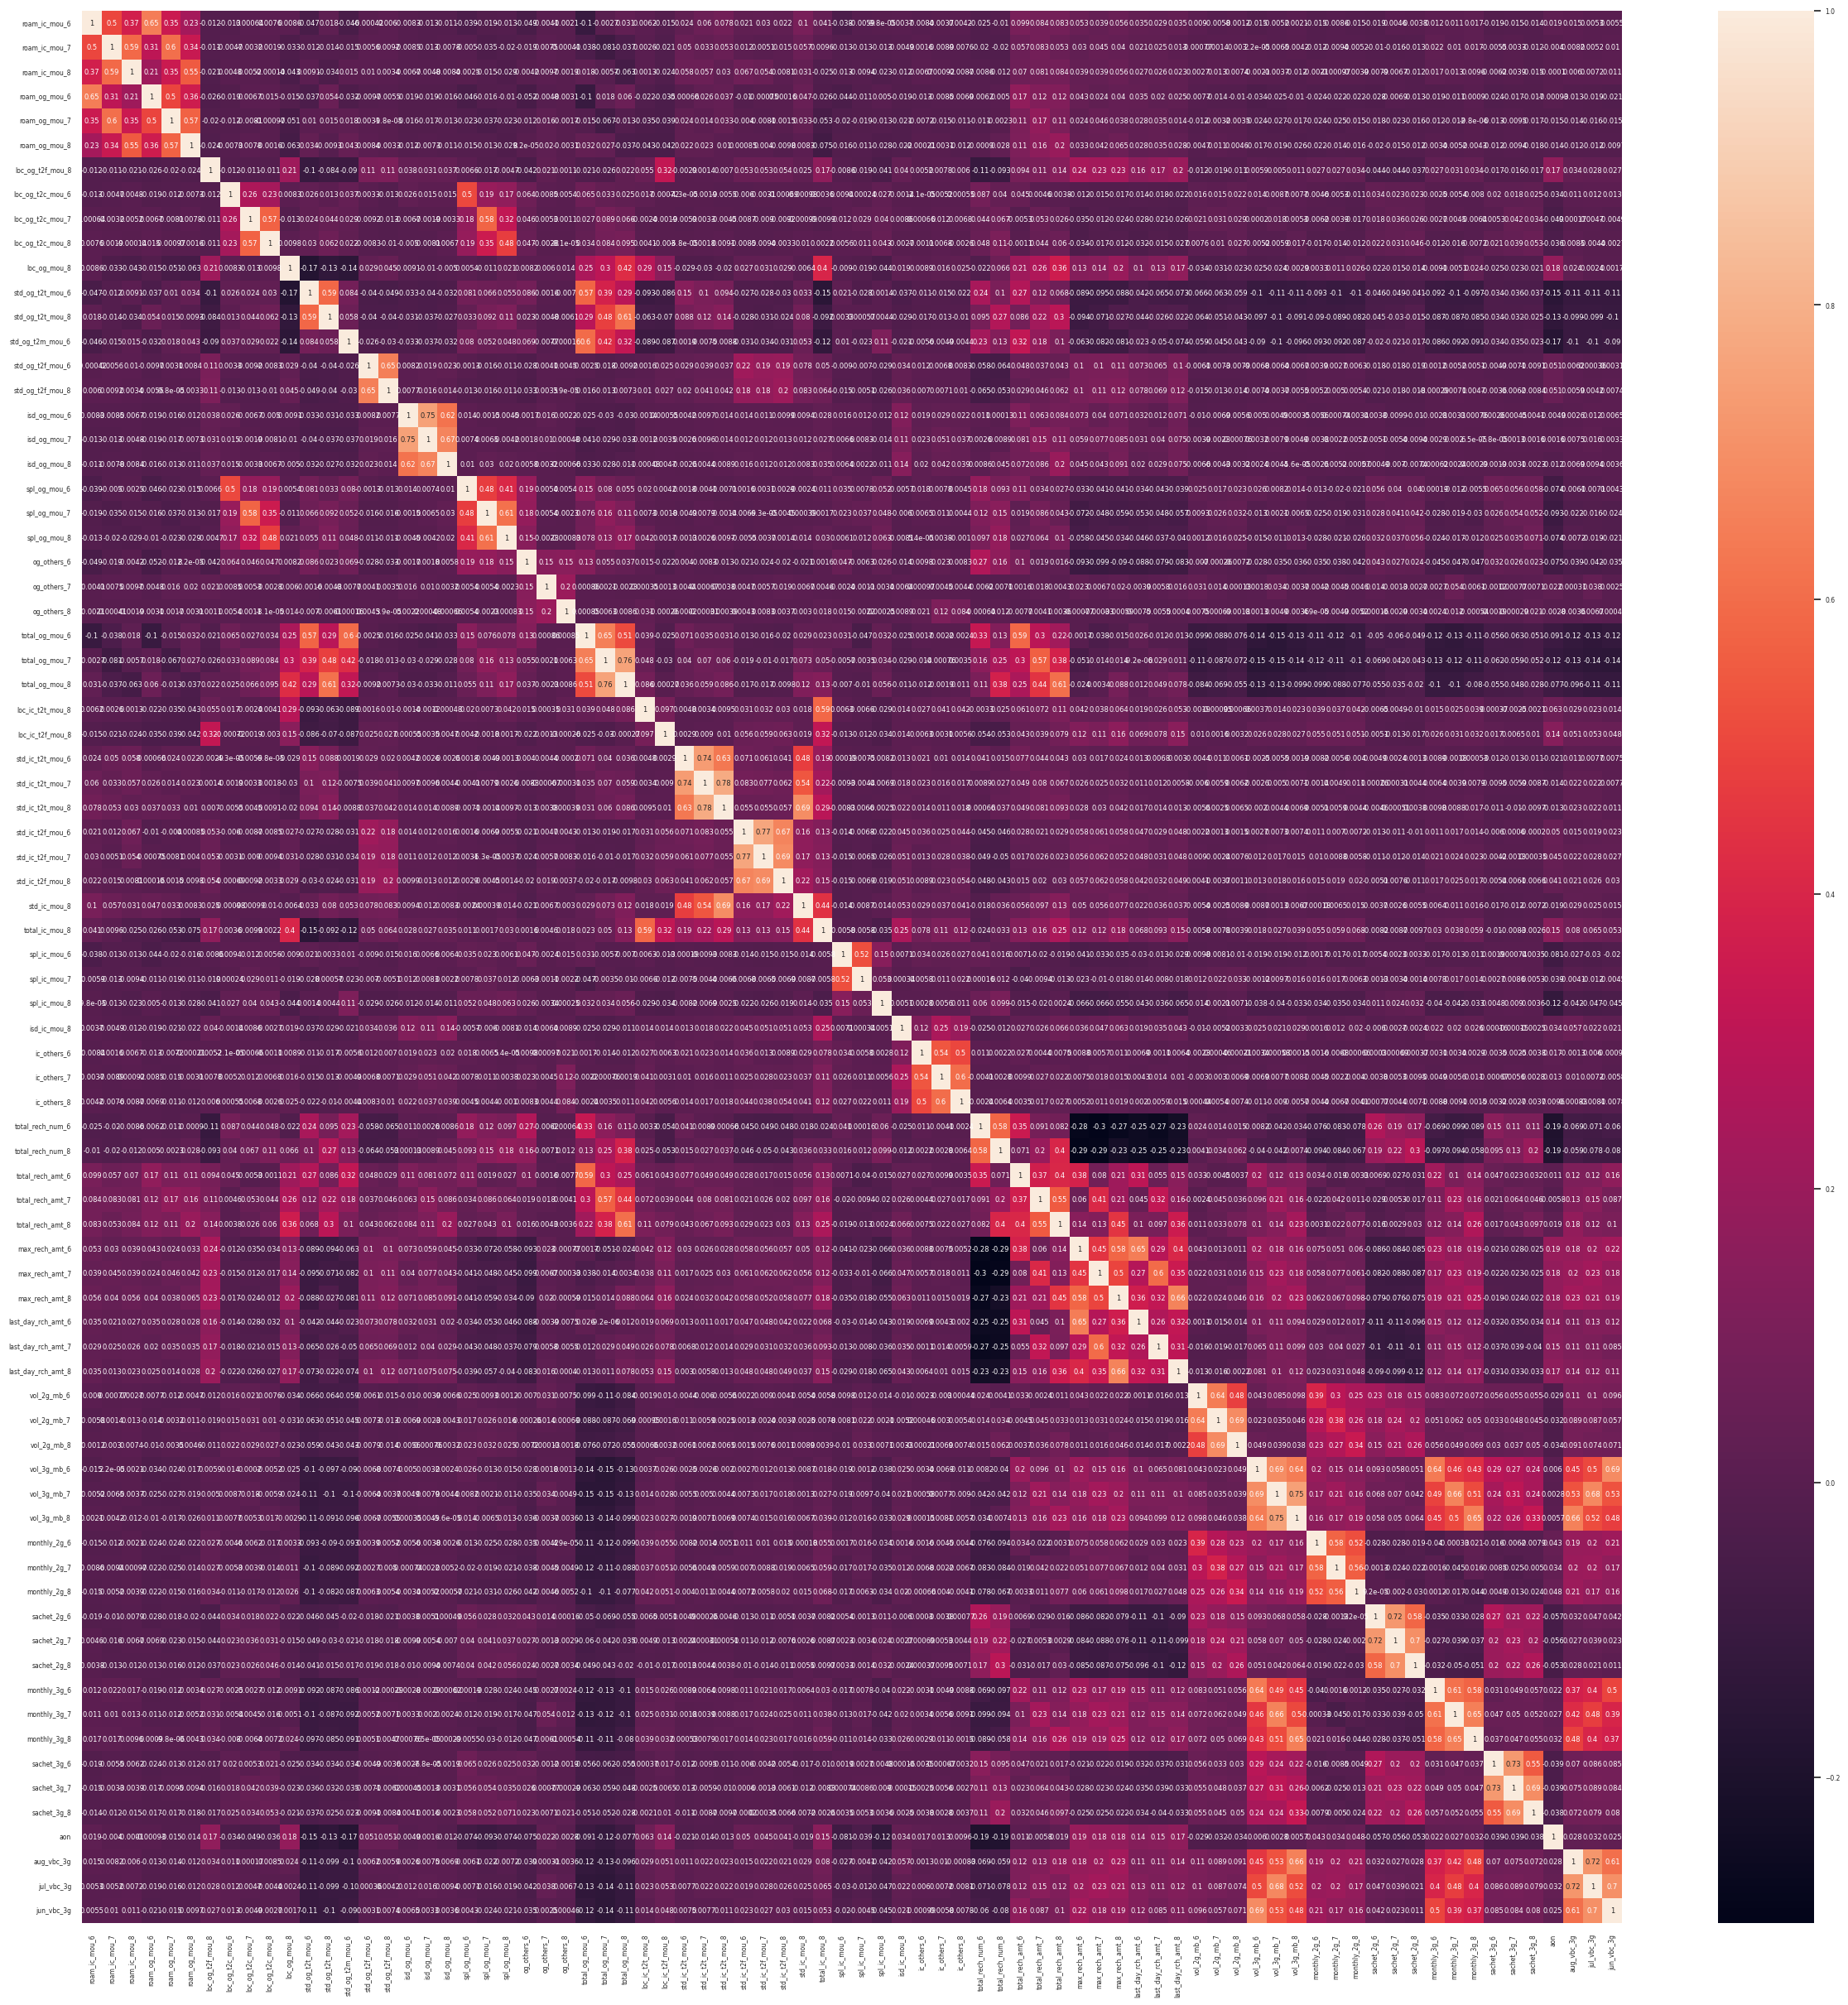

In [1177]:
sns.set(font_scale=0.5)
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building


#### Running Your First Training Model

In [1178]:
import statsmodels.api as sm

In [1179]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19116
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 18 Apr 2023   Deviance:                       3779.8
Time:                        15:55:15   Pearson chi2:                 5.87e+05
No. Iterations:                    40   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3393      0.155     -8.642      0.000      -1.643      -1.036
roam_ic_mou_6          2.0781      1.392      1.493      0.136      -0.651       4.807
roam_ic_mou_7          2.0317      2.347      0.866      0.387      -2.568       6.631
roam_ic_mou_8          1.5285      2.034      0.751      0.452      -2.458       5.515
roam_og_mou_6          0.5455      0.997      0.547      0.584      -1.408       2.499
roam_og_mou_7          1.8171      0.988      1.839      0.066      -0.119       3.753
roam_og_mou_8          1.4290      1.456      0.982      0.326      -1.424       4.282
loc_og_t2f_mou_8      -9.8860     12.721     -0.777      0.437     -34.818      15.046
loc_og_t2c_mou_6       5.9010      2.642      2.233      0.026       0.722      11.080
loc_og_t2c_mou_7      -1.5092      4.002     -0.377      0.706      -9.353       6.335
loc_og_t2c_mou_8       3.1086      3.688      0.843      0.399      -4.119      10.336
loc_og_mou_8         -26.9852      6.676     -4.042      0.000     -40.070     -13.900
std_og_t2t_mou_6       4.1065      1.488      2.760      0.006       1.190       7.023
std_og_t2t_mou_8       0.4861      1.551      0.313      0.754      -2.554       3.526
std_og_t2m_mou_6       3.9786      1.444      2.755      0.006       1.148       6.809
std_og_t2f_mou_6     -15.5528      9.130     -1.704      0.088     -33.446       2.341
std_og_t2f_mou_8       3.2755      3.672      0.892      0.372      -3.921      10.472
isd_og_mou_6           5.8269      4.462      1.306      0.192      -2.918      14.572
isd_og_mou_7          -1.5564      4.316     -0.361      0.718     -10.015       6.902
isd_og_mou_8         -89.6430     71.466     -1.254      0.210    -229.713      50.427
spl_og_mou_6         -10.2729      4.639     -2.215      0.027     -19.364      -1.182
spl_og_mou_7           3.2154      3.002      1.071      0.284      -2.668       9.099
spl_og_mou_8         -10.7139      6.600     -1.623      0.105     -23.650       2.222
og_others_6           -1.4293      2.458     -0.581      0.561      -6.247       3.389
og_others_7          -24.5326    112.374     -0.218      0.827    -244.782     195.717
og_others_8        -5.518e+05   5.55e+07     -0.010      0.992   -1.09e+08    1.08e+08
total_og_mou_6        -2.6143      2.192     -1.193      0.233      -6.911       1.682
total_og_mou_7         1.3134      1.207      1.088      0.277      -1.053       3.680
total_og_mou_8        -7.9917      1.890     -4.227      0.000     -11.697      -4.286
loc_ic_t2t_mou_8       4.9237     10.032      0.491      0.624     -14.739      24.587
loc_ic_t2f_mou_8     -31.6710     15.052     -2.104      0.035     -61.173      -2.169
std_ic_t2t_mou_6       8.6342      4.105      2.103      0.035       0.589      16.679
std_ic_t2t_mou_7      20.4269      7.5

### Step 8: Feature Selection Using RFE

In [1180]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1181]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1182]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True, False, False,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False,  True, False, False, False,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False])

In [1183]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', True, 1),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 2),
 ('loc_og_t2c_mou_7', False, 4),
 ('loc_og_t2c_mou_8', False, 3),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_8', False, 3),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2f_mou_6', False, 2),
 ('std_og_t2f_mou_8', False, 2),
 ('isd_og_mou_6', False, 4),
 ('isd_og_mou_7', False, 3),
 ('isd_og_mou_8', False, 3),
 ('spl_og_mou_6', True, 1),
 ('spl_og_mou_7', False, 4),
 ('spl_og_mou_8', True, 1),
 ('og_others_6', True, 1),
 ('og_others_7', False, 4),
 ('og_others_8', False, 4),
 ('total_og_mou_6', False, 3),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_6', False, 2),
 ('std_ic_t2t_mou_7', False, 3),
 ('std_ic_t2t_mou_8', False,

In [1184]:
col = X_train.columns[rfe.support_]

In [1185]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_7',
       'og_others_7', 'og_others_8', 'total_og_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'last_day_rch_amt_6', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'jun_vbc_3g'],
      dtype='object')

##### Assessing the model with StatsModels

In [1186]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19155
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1923.9
Date:                Tue, 18 Apr 2023   Deviance:                       3847.8
Time:                        15:55:16   Pearson chi2:                 6.45e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.09098
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3029      0.144     -9.035      0.000      -1.585      -1.020
roam_ic_mou_6          2.2276      1.359      1.639      0.101      -0.437       4.892
roam_ic_mou_7          1.6211      2.286      0.709      0.478      -2.859       6.101
roam_ic_mou_8          1.8324      2.044      0.897      0.370      -2.173       5.838
roam_og_mou_6          0.8032      0.889      0.904      0.366      -0.939       2.545
roam_og_mou_7          1.6571      0.926      1.790      0.073      -0.157       3.471
roam_og_mou_8          2.0434      1.351      1.513      0.130      -0.604       4.690
loc_og_t2f_mou_8     -14.3889     13.302     -1.082      0.279     -40.461      11.683
loc_og_mou_8         -28.5664      6.167     -4.632      0.000     -40.654     -16.479
std_og_t2t_mou_6       2.5721      0.585      4.394      0.000       1.425       3.719
std_og_t2m_mou_6       2.2817      0.580      3.935      0.000       1.145       3.418
spl_og_mou_6          -2.5125      2.583     -0.973      0.331      -7.576       2.551
spl_og_mou_8          -7.0912      4.594     -1.544      0.123     -16.094       1.912
og_others_6           -2.0495      2.074     -0.988      0.323      -6.115       2.016
total_og_mou_7         1.2109      0.986      1.228      0.220      -0.722       3.144
total_og_mou_8        -7.3175      1.443     -5.070      0.000     -10.147      -4.489
loc_ic_t2t_mou_8       6.7016      9.836      0.681      0.496     -12.577      25.980
loc_ic_t2f_mou_8     -30.6761     14.897     -2.059      0.039     -59.873      -1.479
std_ic_mou_8          21.0143      6.957      3.020      0.003       7.378      34.650
total_ic_mou_8       -41.1678      7.207     -5.712      0.000     -55.294     -27.042
spl_ic_mou_8          -4.4819      1.105     -4.055      0.000      -6.648      -2.316
total_rech_num_6      -2.4261      1.891     -1.283      0.199      -6.132       1.280
total_rech_num_8      -6.0705      1.541     -3.939      0.000      -9.091      -3.050
total_rech_amt_6      -0.5697      0.894     -0.637      0.524      -2.322       1.183
total_rech_amt_7       2.2433      0.796      2.819      0.005       0.684       3.803
total_rech_amt_8       2.7510      2.284      1.204      0.228      -1.726       7.228
max_rech_amt_8        -1.4589      2.734     -0.534      0.594      -6.817       3.899
last_day_rch_amt_7    -0.9919      1.097     -0.904      0.366      -3.143       1.159
last_day_rch_amt_8   -16.5607      3.650     -4.537      0.000     -23.715      -9.406
vol_2g_mb_8           -6.8685      4.937     -1.391      0.164     -16.545       2.808
monthly_2g_6          -1.0316      0.919     -1.122      0.262      -2.834       0.771
monthly_2g_7          -1.4364      1.138     -1.262      0.207      -3.668       0.795
monthly_2g_8          -5.6510      1.9

In [1187]:
#LET US DROP COLUMNS WITH HIGH p|Z| VALUES STARTING WITH max_rech_amt_8
col = col.drop('max_rech_amt_8') 

In [1188]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19156
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1924.1
Date:                Tue, 18 Apr 2023   Deviance:                       3848.1
Time:                        15:55:17   Pearson chi2:                 6.55e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.09097
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3231      0.139     -9.525      0.000      -1.595      -1.051
roam_ic_mou_6          2.2408      1.357      1.651      0.099      -0.420       4.901
roam_ic_mou_7          1.5806      2.285      0.692      0.489      -2.898       6.059
roam_ic_mou_8          1.8136      2.040      0.889      0.374      -2.185       5.812
roam_og_mou_6          0.7952      0.889      0.895      0.371      -0.947       2.537
roam_og_mou_7          1.6589      0.926      1.792      0.073      -0.156       3.473
roam_og_mou_8          2.2006      1.322      1.665      0.096      -0.390       4.791
loc_og_t2f_mou_8     -14.7397     13.328     -1.106      0.269     -40.862      11.383
loc_og_mou_8         -28.5421      6.169     -4.626      0.000     -40.634     -16.451
std_og_t2t_mou_6       2.5661      0.585      4.387      0.000       1.420       3.713
std_og_t2m_mou_6       2.2774      0.580      3.928      0.000       1.141       3.414
spl_og_mou_6          -2.5020      2.583     -0.968      0.333      -7.565       2.561
spl_og_mou_8          -7.1261      4.596     -1.550      0.121     -16.134       1.882
og_others_6           -2.1058      2.039     -1.033      0.302      -6.103       1.891
total_og_mou_7         1.1914      0.985      1.210      0.226      -0.738       3.121
total_og_mou_8        -7.2070      1.433     -5.030      0.000     -10.015      -4.399
loc_ic_t2t_mou_8       6.6698      9.837      0.678      0.498     -12.610      25.949
loc_ic_t2f_mou_8     -30.5414     14.889     -2.051      0.040     -59.722      -1.360
std_ic_mou_8          20.9600      6.964      3.010      0.003       7.310      34.610
total_ic_mou_8       -41.1497      7.211     -5.707      0.000     -55.282     -27.017
spl_ic_mou_8          -4.4879      1.106     -4.059      0.000      -6.655      -2.321
total_rech_num_6      -2.3647      1.882     -1.256      0.209      -6.054       1.324
total_rech_num_8      -5.8354      1.474     -3.958      0.000      -8.725      -2.945
total_rech_amt_6      -0.5463      0.892     -0.612      0.540      -2.295       1.202
total_rech_amt_7       2.2596      0.793      2.850      0.004       0.706       3.814
total_rech_amt_8       2.1644      2.024      1.069      0.285      -1.803       6.131
last_day_rch_amt_7    -1.0790      1.077     -1.002      0.316      -3.190       1.032
last_day_rch_amt_8   -16.7348      3.589     -4.663      0.000     -23.769      -9.701
vol_2g_mb_8           -6.8506      4.935     -1.388      0.165     -16.522       2.821
monthly_2g_6          -1.0269      0.919     -1.117      0.264      -2.828       0.774
monthly_2g_7          -1.4321      1.138     -1.258      0.208      -3.663       0.799
monthly_2g_8          -5.7076      1.902     -3.001      0.003      -9.435      -1.980
sachet_2g_8           -2.6761      2.0

In [1189]:
#LETS DROP COLUMN jul_vbc_3g
col = col.drop('jul_vbc_3g')

In [1190]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19157
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1924.2
Date:                Tue, 18 Apr 2023   Deviance:                       3848.4
Time:                        15:55:17   Pearson chi2:                 6.62e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.09095
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3235      0.139     -9.525      0.000      -1.596      -1.051
roam_ic_mou_6          2.2358      1.358      1.647      0.100      -0.425       4.897
roam_ic_mou_7          1.6103      2.286      0.704      0.481      -2.870       6.091
roam_ic_mou_8          1.7860      2.042      0.875      0.382      -2.216       5.788
roam_og_mou_6          0.7852      0.889      0.884      0.377      -0.956       2.527
roam_og_mou_7          1.6450      0.925      1.777      0.075      -0.169       3.459
roam_og_mou_8          2.1918      1.321      1.659      0.097      -0.398       4.781
loc_og_t2f_mou_8     -14.7947     13.333     -1.110      0.267     -40.927      11.338
loc_og_mou_8         -28.6289      6.170     -4.640      0.000     -40.723     -16.535
std_og_t2t_mou_6       2.5563      0.585      4.372      0.000       1.410       3.702
std_og_t2m_mou_6       2.2693      0.580      3.916      0.000       1.133       3.405
spl_og_mou_6          -2.5085      2.587     -0.970      0.332      -7.579       2.562
spl_og_mou_8          -7.1293      4.597     -1.551      0.121     -16.139       1.880
og_others_6           -2.1139      2.039     -1.037      0.300      -6.110       1.883
total_og_mou_7         1.1625      0.983      1.183      0.237      -0.763       3.088
total_og_mou_8        -7.2035      1.433     -5.027      0.000     -10.012      -4.395
loc_ic_t2t_mou_8       6.6651      9.835      0.678      0.498     -12.611      25.941
loc_ic_t2f_mou_8     -30.4642     14.879     -2.047      0.041     -59.627      -1.301
std_ic_mou_8          20.9839      6.960      3.015      0.003       7.342      34.626
total_ic_mou_8       -41.1494      7.209     -5.708      0.000     -55.279     -27.020
spl_ic_mou_8          -4.4872      1.105     -4.060      0.000      -6.654      -2.321
total_rech_num_6      -2.3865      1.883     -1.267      0.205      -6.078       1.305
total_rech_num_8      -5.8343      1.475     -3.955      0.000      -8.725      -2.943
total_rech_amt_6      -0.5238      0.891     -0.588      0.557      -2.270       1.223
total_rech_amt_7       2.2880      0.790      2.895      0.004       0.739       3.837
total_rech_amt_8       2.1641      2.024      1.069      0.285      -1.803       6.131
last_day_rch_amt_7    -1.0802      1.079     -1.001      0.317      -3.195       1.035
last_day_rch_amt_8   -16.7480      3.590     -4.666      0.000     -23.784      -9.712
vol_2g_mb_8           -6.8419      4.938     -1.386      0.166     -16.520       2.837
monthly_2g_6          -1.0019      0.919     -1.091      0.275      -2.802       0.798
monthly_2g_7          -1.3668      1.131     -1.208      0.227      -3.584       0.851
monthly_2g_8          -5.7472      1.901     -3.023      0.003      -9.473      -2.021
sachet_2g_8           -2.6739      2.0

In [1191]:
#LET US IMPLELMENT THE CONCEPT INTO A LOOP
while True:
    # extract the summary table
    summary_table = res.summary2().tables[1]

    # sort the table by p-values (in ascending order)
    summary_table = summary_table.sort_values('P>|z|')

    # extract the row with the highest p-value
    highest_p_value_row = summary_table.iloc[-1]

    # extract the column name and p-value
    column_name = highest_p_value_row.name
    p_value = highest_p_value_row['P>|z|']

    # if the highest p-value is below the threshold, stop eliminating columns
    if p_value < 0.05:
        break

    # otherwise, remove the column with the highest p-value from the list
    col = col.drop(column_name)
    print(len(col))

    # fit the updated logistic regression model
    X_train_sm = sm.add_constant(X_train[col])
    logmf = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = logmf.fit()

36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20


In [1192]:
col

Index(['roam_ic_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'spl_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'monthly_3g_8',
       'aon', 'aug_vbc_3g'],
      dtype='object')

In [1193]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19174
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.0
Date:                Tue, 18 Apr 2023   Deviance:                       3876.1
Time:                        15:55:24   Pearson chi2:                 8.09e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08964
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5077      0.119    -12.715      0.000      -1.740      -1.275
roam_ic_mou_6          3.6329      0.933      3.894      0.000       1.804       5.462
roam_og_mou_7          1.8328      0.693      2.645      0.008       0.475       3.191
roam_og_mou_8          3.8333      0.898      4.269      0.000       2.074       5.593
loc_og_mou_8         -31.0405      6.010     -5.165      0.000     -42.819     -19.262
std_og_t2t_mou_6       2.3214      0.394      5.887      0.000       1.548       3.094
std_og_t2m_mou_6       2.0857      0.393      5.311      0.000       1.316       2.855
spl_og_mou_8          -9.4572      4.611     -2.051      0.040     -18.495      -0.419
total_og_mou_8        -5.0592      0.971     -5.208      0.000      -6.963      -3.155
loc_ic_t2f_mou_8     -36.7659     14.715     -2.499      0.012     -65.606      -7.926
std_ic_mou_8          19.1088      6.058      3.154      0.002       7.235      30.982
total_ic_mou_8       -38.3171      5.652     -6.780      0.000     -49.394     -27.240
spl_ic_mou_8          -4.6292      1.109     -4.173      0.000      -6.803      -2.455
total_rech_num_8      -5.9309      1.128     -5.256      0.000      -8.143      -3.719
total_rech_amt_7       2.4824      0.534      4.649      0.000       1.436       3.529
last_day_rch_amt_8   -15.0169      3.203     -4.688      0.000     -21.295      -8.739
vol_2g_mb_8          -10.3496      4.743     -2.182      0.029     -19.646      -1.053
monthly_2g_8          -6.5044      1.761     -3.694      0.000      -9.955      -3.054
monthly_3g_8          -7.9697      2.420     -3.294      0.001     -12.712      -3.227
aon                   -0.5108      0.252     -2.029      0.042      -1.004      -0.017
aug_vbc_3g           -15.6712      5.451     -2.875      0.004     -26.355      -4.987
======================================================================================
"""

In [1194]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4104     0.088879
16868    0.000514
14079    0.000070
3323     0.049248
10641    0.073681
16298    0.000042
25858    0.002364
1150     0.000017
1576     0.001878
22682    0.068413
dtype: float64

In [1195]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([8.88786266e-02, 5.14386626e-04, 7.00529311e-05, 4.92478972e-02,
       7.36809841e-02, 4.23010991e-05, 2.36400072e-03, 1.69114528e-05,
       1.87810546e-03, 6.84131988e-02])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [1196]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  CustID
0      0    0.088879    4104
1      0    0.000514   16868
2      0    0.000070   14079
3      0    0.049248    3323
4      0    0.073681   10641

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1197]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.088879    4104          0
1      0    0.000514   16868          0
2      0    0.000070   14079          0
3      0    0.049248    3323          0
4      0    0.073681   10641          0

In [1198]:
from sklearn import metrics

In [1199]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[18508    37]
 [  614    36]]


In [1200]:
# Predicted     not_churn    churn
# Actual
# not_churn        18508      37
# churn            614       36 

In [1201]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.9660849179473822


#### Checking VIFs

In [1202]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1203]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13    total_rech_amt_7  5.12
7       total_og_mou_8  4.69
10      total_ic_mou_8  3.08
3         loc_og_mou_8  2.99
12    total_rech_num_8  2.60
18                 aon  2.06
14  last_day_rch_amt_8  1.81
1        roam_og_mou_7  1.72
5     std_og_t2m_mou_6  1.62
2        roam_og_mou_8  1.60
19          aug_vbc_3g  1.59
9         std_ic_mou_8  1.57
17        monthly_3g_8  1.54
4     std_og_t2t_mou_6  1.54
16        monthly_2g_8  1.37
8     loc_ic_t2f_mou_8  1.29
15         vol_2g_mb_8  1.24
0        roam_ic_mou_6  1.22
6         spl_og_mou_8  1.16
11        spl_ic_mou_8  1.09

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'total_rech_amt_7' has the highest VIF. So let's start by dropping that.

In [1204]:
col = col.drop('total_rech_amt_7')

In [1205]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logmfin = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmfin.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19175
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Tue, 18 Apr 2023   Deviance:                       3896.6
Time:                        15:55:26   Pearson chi2:                 7.92e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08867
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2670      0.106    -11.919      0.000      -1.475      -1.059
roam_ic_mou_6          3.5661      0.956      3.730      0.000       1.692       5.440
roam_og_mou_7          2.4261      0.676      3.587      0.000       1.100       3.752
roam_og_mou_8          4.4643      0.875      5.105      0.000       2.750       6.178
loc_og_mou_8         -29.6705      5.974     -4.966      0.000     -41.380     -17.961
std_og_t2t_mou_6       2.5117      0.392      6.411      0.000       1.744       3.280
std_og_t2m_mou_6       2.3774      0.387      6.144      0.000       1.619       3.136
spl_og_mou_8          -9.2666      4.582     -2.022      0.043     -18.248      -0.285
total_og_mou_8        -4.1641      0.958     -4.345      0.000      -6.042      -2.286
loc_ic_t2f_mou_8     -35.8327     14.617     -2.451      0.014     -64.482      -7.184
std_ic_mou_8          19.3220      6.079      3.178      0.001       7.407      31.237
total_ic_mou_8       -38.6658      5.666     -6.825      0.000     -49.770     -27.561
spl_ic_mou_8          -4.8547      1.117     -4.345      0.000      -7.045      -2.665
total_rech_num_8      -6.0144      1.140     -5.278      0.000      -8.248      -3.781
last_day_rch_amt_8   -15.0141      3.261     -4.605      0.000     -21.405      -8.623
vol_2g_mb_8           -9.9018      4.746     -2.086      0.037     -19.204      -0.599
monthly_2g_8          -6.4010      1.762     -3.633      0.000      -9.854      -2.948
monthly_3g_8          -7.5379      2.425     -3.108      0.002     -12.292      -2.784
aon                   -0.5216      0.251     -2.075      0.038      -1.014      -0.029
aug_vbc_3g           -14.0155      5.379     -2.605      0.009     -24.559      -3.472
======================================================================================
"""

In [1206]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1207]:
y_train_pred[:10]

array([8.51882823e-02, 4.50003525e-04, 7.26738166e-05, 3.32194131e-02,
       7.72444212e-02, 4.57502297e-05, 2.72573004e-03, 1.94281662e-05,
       1.56075037e-03, 5.68173598e-02])

In [1208]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [1209]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted
0      0    0.085188    4104          0
1      0    0.000450   16868          0
2      0    0.000073   14079          0
3      0    0.033219    3323          0
4      0    0.077244   10641          0

In [1210]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.965720239645741


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [1211]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
7       total_og_mou_8  4.45
10      total_ic_mou_8  3.03
3         loc_og_mou_8  2.95
12    total_rech_num_8  2.40
17                 aon  1.95
13  last_day_rch_amt_8  1.74
1        roam_og_mou_7  1.69
2        roam_og_mou_8  1.59
9         std_ic_mou_8  1.57
18          aug_vbc_3g  1.57
5     std_og_t2m_mou_6  1.55
16        monthly_3g_8  1.50
4     std_og_t2t_mou_6  1.49
15        monthly_2g_8  1.36
8     loc_ic_t2f_mou_8  1.29
14         vol_2g_mb_8  1.24
0        roam_ic_mou_6  1.22
6         spl_og_mou_8  1.16
11        spl_ic_mou_8  1.09

All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [1212]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[18509,    36],
       [  622,    28]])

In [1213]:
# Actual/Predicted     not_churn    churn
        # not_churn        18509      36
        # churn            622        28  

In [1214]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.965720239645741

## Metrics beyond simply accuracy

In [1215]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.043076923076923075

In [1217]:
# Let us calculate specificity
TN / float(TN+FP)

0.9980587759503909

In [1218]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0019412240496090591


In [1219]:
# positive predictive value 
print (TP / float(TP+FP))

0.4375


In [1220]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9674873242381475


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1221]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1222]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

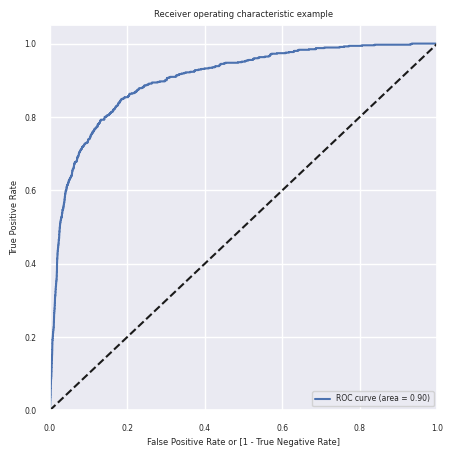

In [1223]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1224]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.085188    4104          0    1    0    0    0    0    0    0   
1      0    0.000450   16868          0    1    0    0    0    0    0    0   
2      0    0.000073   14079          0    1    0    0    0    0    0    0   
3      0    0.033219    3323          0    1    0    0    0    0    0    0   
4      0    0.077244   10641          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [1225]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.033863  1.000000  0.000000
0.1   0.1  0.917583  0.698462  0.925263
0.2   0.2  0.956916  0.512308  0.972499
0.3   0.3  0.964418  0.264615  0.988946
0.4   0.4  0.965824  0.093846  0.996387
0.5   0.5  0.965720  0.043077  0.998059
0.6   0.6  0.965877  0.018462  0.999083
0.7   0.7  0.965929  0.007692  0.999515
0.8   0.8  0.966137  0.003077  0.999892
0.9   0.9  0.966241  0.003077  1.000000


In [1226]:
xtick = [i/100 for i in range(0, 101, 2)]

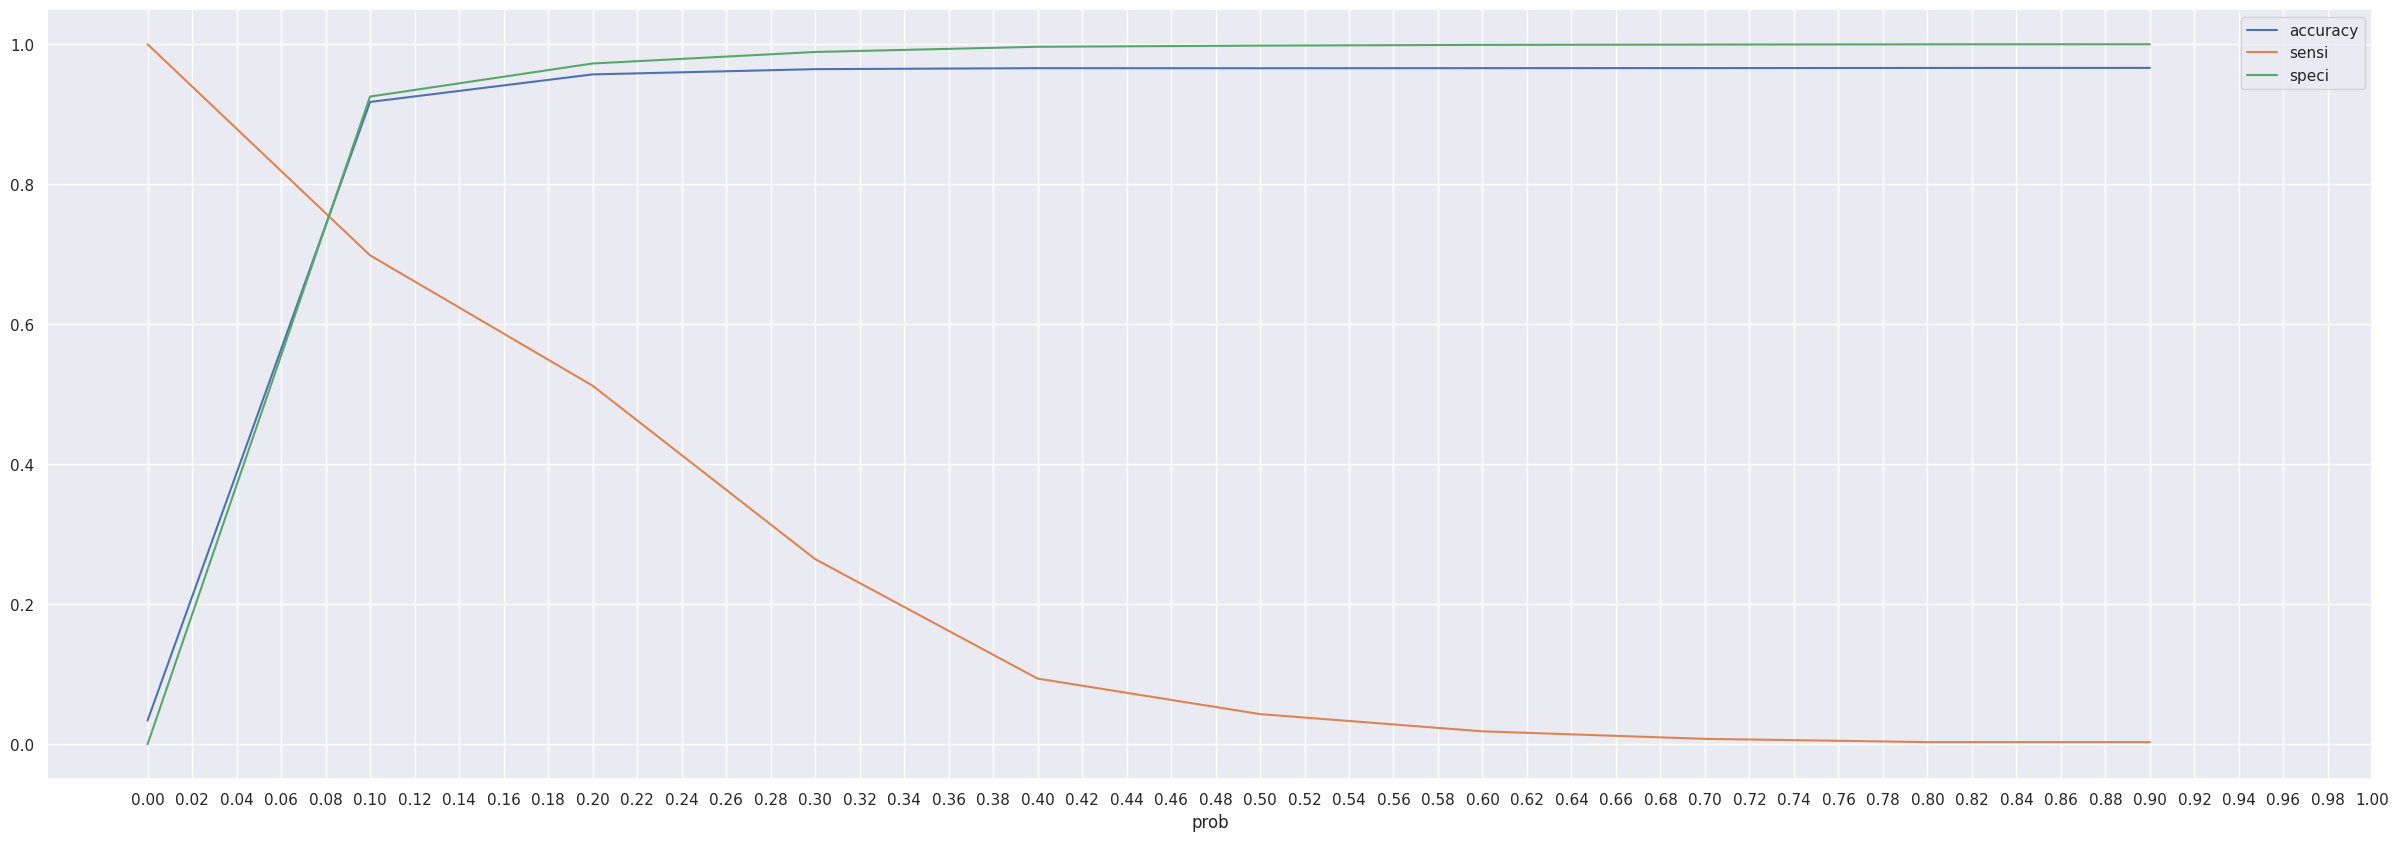

In [1227]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set(font_scale=1.0)
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(30,10)).set_xticks(xtick)
plt.show()

#### From the curve above, 0.08 is the optimum point to take it as a cutoff probability.

In [1228]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0      0    0.085188    4104          0    1    0    0    0    0    0    0   
1      0    0.000450   16868          0    1    0    0    0    0    0    0   
2      0    0.000073   14079          0    1    0    0    0    0    0    0   
3      0    0.033219    3323          0    1    0    0    0    0    0    0   
4      0    0.077244   10641          0    1    0    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    0    0    0                1  
1    0    0    0                0  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [1229]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8973170096379265

In [1230]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16749,  1796],
       [  175,   475]])

In [1231]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1232]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7307692307692307

In [1233]:
# Let us calculate specificity
TN / float(TN+FP)

0.9031544890806147

In [1234]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09684551091938529


In [1235]:
# Positive predictive value 
print (TP / float(TP+FP))

0.20915896081021576


In [1236]:
# Negative predictive value
print (TN / float(TN+ FN))

0.989659654927913


In [1237]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
results = pd.DataFrame({'Method':['Gen_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = results[['Method', 'ACCURACY', 'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  POSITIVE PREDICTED VALUE
0  Gen_Logistic_Regression  0.897317     0.730769                  0.209159

## Precision and Recall

In [1238]:
#Looking at the confusion matrix again

In [1239]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[18509,    36],
       [  622,    28]])

##### Precision
TP / TP + FP

In [1240]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.4375

##### Recall
TP / TP + FN

In [1241]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.043076923076923075

Using sklearn utilities for the same

In [1242]:
from sklearn.metrics import precision_score, recall_score

In [1243]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.4375

In [1244]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.043076923076923075

### Precision and recall tradeoff

In [1245]:
from sklearn.metrics import precision_recall_curve

In [1246]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0        0
 1        0
 2        0
 3        0
 4        0
         ..
 19190    0
 19191    0
 19192    0
 19193    0
 19194    0
 Name: Churn, Length: 19195, dtype: int64,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 19190    0
 19191    0
 19192    0
 19193    0
 19194    0
 Name: predicted, Length: 19195, dtype: int64)

In [1247]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

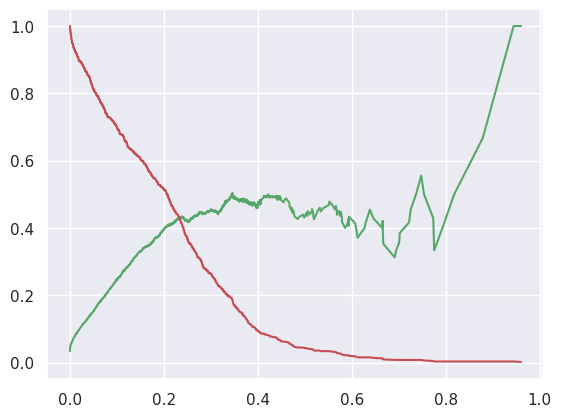

In [1248]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [1249]:
XT_col = list(X_test.columns)

In [1250]:
cont_num_cols = [col1 for col1 in cont_num_cols if col1 in XT_col]

In [1251]:
X_train[cont_num_cols] = scaler.fit_transform(X_train[cont_num_cols])

In [1252]:
X_test = X_test[col]
X_test.head()

roam_ic_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_mou_8  \
9146             0.0            0.0            0.0       1356.58   
27507            0.0            0.0            0.0          8.84   
14455            0.0            0.0            0.0        229.61   
2560             0.0            0.0            0.0         67.56   
6151             0.0            0.0            0.0        171.83   

       std_og_t2t_mou_6  std_og_t2m_mou_6  spl_og_mou_8  total_og_mou_8  \
9146               0.00              0.78          0.00         1356.58   
27507              0.00             15.54          0.00           86.71   
14455              0.00              0.00          9.89          239.51   
2560               3.38            670.81          1.61          105.51   
6151              21.99             10.13          3.08          207.04   

       loc_ic_t2f_mou_8  std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  \
9146               0.99          0.00          345.08          0.00   
27507              0.48         46.26          174.18          0.00   
14455             19.04          0.56          184.58          0.00   
2560               0.00          8.53           90.94          0.08   
6151               0.00         20.46          170.91          0.00   

       total_rech_num_8  last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  \
9146               37.0                20.0       184.53           0.0   
27507              31.0                30.0         0.00           0.0   
14455              13.0                 0.0       693.76           1.0   
2560                4.0                30.0         0.00           0.0   
6151               19.0                50.0        32.78           1.0   

       monthly_3g_8     aon  aug_vbc_3g  
9146            1.0   254.0      231.92  
27507           0.0   492.0        0.00  
14455           0.0  2098.0        0.00  
2560            0.0   235.0        0.00  
6151            0.0  1927.0      544.19

In [1253]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [1254]:
y_test_pred = res.predict(X_test_sm)

In [1255]:
y_test_pred[:10]

9146     0.0
27507    0.0
14455    0.0
2560     0.0
6151     0.0
23307    0.0
21993    0.0
11387    0.0
8364     0.0
7207     0.0
dtype: float64

In [1256]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1257]:
# Let's see the head
y_pred_1.head()

0
9146   0.0
27507  0.0
14455  0.0
2560   0.0
6151   0.0

In [1258]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1259]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [1260]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1261]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1262]:
y_pred_final.head()

churn  CustID    0
0      0    9146  0.0
1      0   27507  0.0
2      0   14455  0.0
3      0    2560  0.0
4      0    6151  0.0

In [1263]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [1264]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','churn','Churn_Prob']]

In [1265]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0    9146      0         0.0
1   27507      0         0.0
2   14455      0         0.0
3    2560      0         0.0
4    6151      0         0.0

In [1266]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.22 else 0)

In [1267]:
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0    9146      0         0.0                0
1   27507      0         0.0                0
2   14455      0         0.0                0
3    2560      0         0.0                0
4    6151      0         0.0                0

In [1268]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9597666220979701

In [1269]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7755,  200],
       [ 131,  141]])

In [1270]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1271]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5183823529411765

In [1272]:
# Let us calculate specificity
TN / float(TN+FP)

0.9748585795097423

In [1273]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
tempResults = pd.DataFrame({'Method':['Gen_Logistic_Regression_0.22'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490

In [1274]:
y_test_pred = res.predict(X_test_sm)

In [1275]:
y_test_pred[:10]

9146     0.0
27507    0.0
14455    0.0
2560     0.0
6151     0.0
23307    0.0
21993    0.0
11387    0.0
8364     0.0
7207     0.0
dtype: float64

In [1276]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1277]:
# Let's see the head
y_pred_1.head()

0
9146   0.0
27507  0.0
14455  0.0
2560   0.0
6151   0.0

In [1278]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1279]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [1280]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1281]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1282]:
y_pred_final.head()

churn  CustID    0
0      0    9146  0.0
1      0   27507  0.0
2      0   14455  0.0
3      0    2560  0.0
4      0    6151  0.0

In [1283]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [1284]:
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','churn','Churn_Prob']]

In [1285]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  churn  Churn_Prob
0    9146      0         0.0
1   27507      0         0.0
2   14455      0         0.0
3    2560      0         0.0
4    6151      0         0.0

In [1286]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.08 else 0)

In [1287]:
y_pred_final.head()

CustID  churn  Churn_Prob  final_predicted
0    9146      0         0.0                0
1   27507      0         0.0                0
2   14455      0         0.0                0
3    2560      0         0.0                0
4    6151      0         0.0                0

In [1288]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9597666220979701

In [1289]:
confusion2 = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted )
confusion2

array([[7755,  200],
       [ 131,  141]])

In [1290]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1291]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5183823529411765

In [1292]:
# Let us calculate specificity
TN / float(TN+FP)

0.9748585795097423

In [1293]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)
tempResults = pd.DataFrame({'Method':['Gen_Logistic_Regression_0.08'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490

<font color='green'> **WE TAKE res MODEL AS OUR MODEL AND ASSIGN A THRESHOLD VALUE OF 0.22** </font>

In [1294]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                19195
Model:                            GLM   Df Residuals:                    19175
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1948.3
Date:                Tue, 18 Apr 2023   Deviance:                       3896.6
Time:                        15:55:30   Pearson chi2:                 7.92e+05
No. Iterations:                    10   Pseudo R-squ. (CS):            0.08867
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2670      0.106    -11.919      0.000      -1.475      -1.059
roam_ic_mou_6          3.5661      0.956      3.730      0.000       1.692       5.440
roam_og_mou_7          2.4261      0.676      3.587      0.000       1.100       3.752
roam_og_mou_8          4.4643      0.875      5.105      0.000       2.750       6.178
loc_og_mou_8         -29.6705      5.974     -4.966      0.000     -41.380     -17.961
std_og_t2t_mou_6       2.5117      0.392      6.411      0.000       1.744       3.280
std_og_t2m_mou_6       2.3774      0.387      6.144      0.000       1.619       3.136
spl_og_mou_8          -9.2666      4.582     -2.022      0.043     -18.248      -0.285
total_og_mou_8        -4.1641      0.958     -4.345      0.000      -6.042      -2.286
loc_ic_t2f_mou_8     -35.8327     14.617     -2.451      0.014     -64.482      -7.184
std_ic_mou_8          19.3220      6.079      3.178      0.001       7.407      31.237
total_ic_mou_8       -38.6658      5.666     -6.825      0.000     -49.770     -27.561
spl_ic_mou_8          -4.8547      1.117     -4.345      0.000      -7.045      -2.665
total_rech_num_8      -6.0144      1.140     -5.278      0.000      -8.248      -3.781
last_day_rch_amt_8   -15.0141      3.261     -4.605      0.000     -21.405      -8.623
vol_2g_mb_8           -9.9018      4.746     -2.086      0.037     -19.204      -0.599
monthly_2g_8          -6.4010      1.762     -3.633      0.000      -9.854      -2.948
monthly_3g_8          -7.5379      2.425     -3.108      0.002     -12.292      -2.784
aon                   -0.5216      0.251     -2.075      0.038      -1.014      -0.029
aug_vbc_3g           -14.0155      5.379     -2.605      0.009     -24.559      -3.472
======================================================================================
"""

## Using Decision Trees

In [1295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [1296]:
X_train.shape, X_test.shape

((19195, 124), (8227, 124))

In [1297]:
from sklearn.tree import DecisionTreeClassifier

In [1298]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [1299]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [1300]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [1301]:
from sklearn.metrics import classification_report

In [1302]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7955
           1       0.53      0.48      0.50       272

    accuracy                           0.97      8227
   macro avg       0.76      0.73      0.74      8227
weighted avg       0.97      0.97      0.97      8227



In [1303]:
from sklearn.metrics import RocCurveDisplay

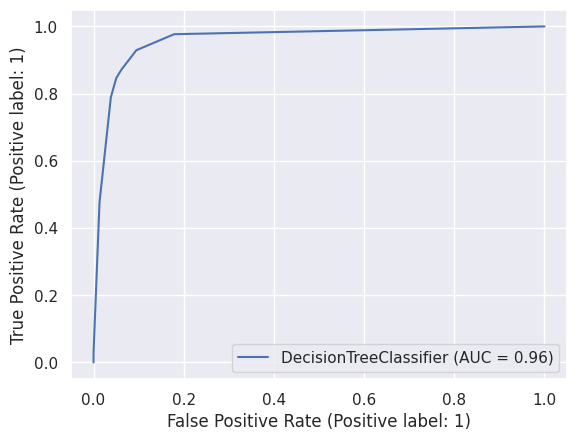

In [1304]:
RocCurveDisplay.from_estimator(dt_base, X_train, y_train)
plt.show()

In [1305]:
accuracy_score(y_test, y_test_pred)

0.9688829463960131

In [1306]:
confusion3 = confusion_matrix(y_test, y_test_pred)
confusion3

array([[7841,  114],
       [ 142,  130]])

In [1307]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [1308]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['GEN_DECISION_TREE_UNTUNED'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787

#### Hyper-parameter tuning for the Decision Tree

In [1309]:
from sklearn.model_selection import GridSearchCV

In [1310]:
dt = DecisionTreeClassifier(random_state=42)

In [1311]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [1312]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1313]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 1.67 s, sys: 219 ms, total: 1.89 s
Wall time: 1min 8s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [1314]:
grid_search.best_score_

0.9688982724534194

In [1315]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

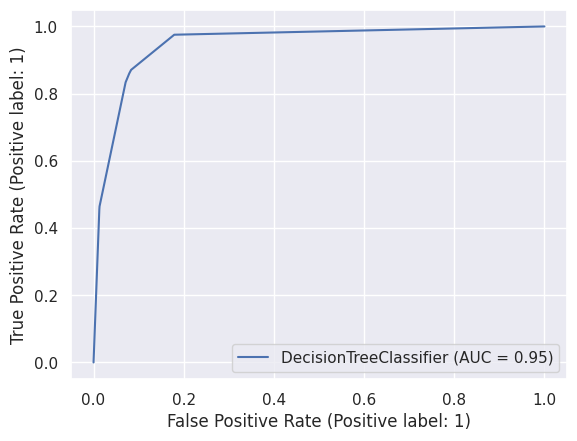

In [1316]:
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

In [1317]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

In [1318]:
accuracy_score(y_test, y_test_pred)

0.9693691503585754

In [1319]:
confusion4 = confusion_matrix(y_test, y_test_pred)
confusion4

array([[7848,  107],
       [ 145,  127]])

In [1320]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [1321]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['GEN_DECISION_TREE_TUNED'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0       GEN_DECISION_TREE_TUNED  0.969369     0.466912   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735

## Using Random Forest

In [1322]:
from sklearn.ensemble import RandomForestClassifier

In [1323]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [1324]:
%%time
rf.fit(X_train, y_train)

CPU times: user 399 ms, sys: 3.67 ms, total: 403 ms
Wall time: 413 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [1325]:
rf.oob_score_

0.9665016931492576

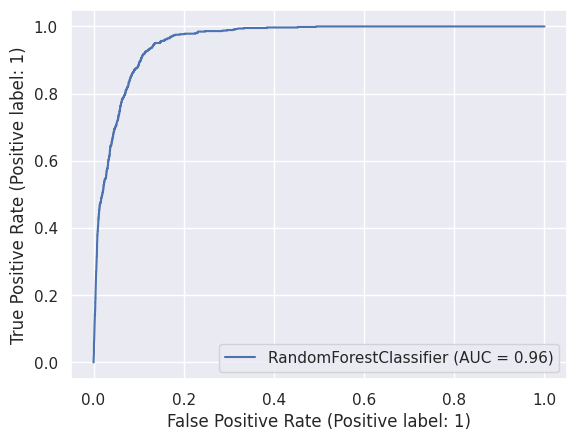

In [1326]:
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

In [1327]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [1328]:
accuracy_score(y_test, y_test_pred)

0.9674243345083262

In [1329]:
confusion5 = confusion_matrix(y_test, y_test_pred)
confusion5

array([[7943,   12],
       [ 256,   16]])

In [1330]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [1331]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['GEN_RANDOM_FOREST_UNTUNED'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0       GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0     GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429

### Hyper-parameter tuning for the Random Forest

In [1332]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [1333]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [1334]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [1335]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
CPU times: user 10.1 s, sys: 622 ms, total: 10.7 s
Wall time: 11min 59s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [1336]:
grid_search.best_score_

0.9696276453488598

In [1337]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=25,
                       n_jobs=-1, random_state=42)

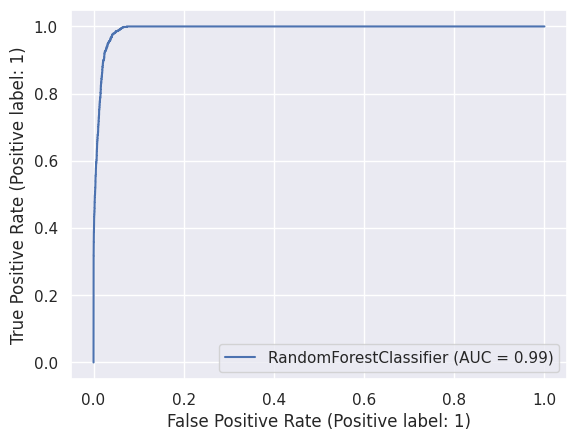

In [1338]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

In [1339]:
rf_best.feature_importances_

array([7.59481146e-03, 8.23963494e-03, 1.38266463e-02, 7.07825838e-03,
       6.19901436e-03, 6.66541961e-03, 7.09053833e-03, 6.20731565e-03,
       1.23038864e-02, 4.08718318e-03, 2.11646301e-02, 5.39094459e-02,
       2.49678551e-03, 2.31642703e-02, 7.50992081e-02, 4.53759003e-03,
       8.34913066e-03, 2.25887326e-02, 3.96809139e-03, 5.51956418e-03,
       1.67156391e-02, 1.68908588e-03, 1.63926494e-03, 2.70476435e-03,
       1.40703043e-03, 1.44300725e-03, 6.89388634e-04, 4.99301369e-03,
       9.22702193e-03, 4.09365836e-02, 9.17878668e-03, 4.81827385e-03,
       6.00226899e-03, 8.11089418e-03, 8.22768012e-03, 7.33373970e-03,
       0.00000000e+00, 4.55572920e-04, 7.76002316e-08, 8.84539742e-03,
       1.34828706e-02, 7.04381542e-03, 1.48989764e-04, 2.02759547e-05,
       0.00000000e+00, 5.16553853e-03, 4.46967631e-03, 4.29036770e-03,
       1.11121298e-03, 0.00000000e+00, 0.00000000e+00, 4.64358601e-03,
       1.08775880e-02, 3.78645929e-02, 6.16633777e-03, 8.55986976e-03,
      

In [1340]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [1341]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
80     total_ic_mou_8  0.078739
14      roam_og_mou_8  0.075099
65       loc_ic_mou_8  0.066670
59   loc_ic_t2m_mou_8  0.064558
11      roam_ic_mou_8  0.053909
..                ...       ...
49        og_others_7  0.000000
36   std_og_t2f_mou_6  0.000000
44       isd_og_mou_8  0.000000
50        og_others_8  0.000000
108      monthly_2g_6  0.000000

[124 rows x 2 columns]

In [1342]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

In [1343]:
accuracy_score(y_test, y_test_pred)

0.9713139662088246

In [1344]:
confusion6 = confusion_matrix(y_test, y_test_pred)
confusion6

array([[7890,   65],
       [ 171,  101]])

In [1345]:
TP = confusion6[1,1] # true positive 
TN = confusion6[0,0] # true negatives
FP = confusion6[0,1] # false positives
FN = confusion6[1,0] # false negatives

In [1346]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['GEN_RANDOM_FOREST_TUNED'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0       GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0     GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0       GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434

# Handling Imbalanced Dataset

In [1347]:
print(df.churn.value_counts())
df.churn.value_counts(normalize = True).reset_index()

0    26500
1      922
Name: churn, dtype: int64


index     churn
0      0  0.966377
1      1  0.033623

Text(0.5, 1.0, 'Class Distributions \n (0: No Churn || 1: Churn)')

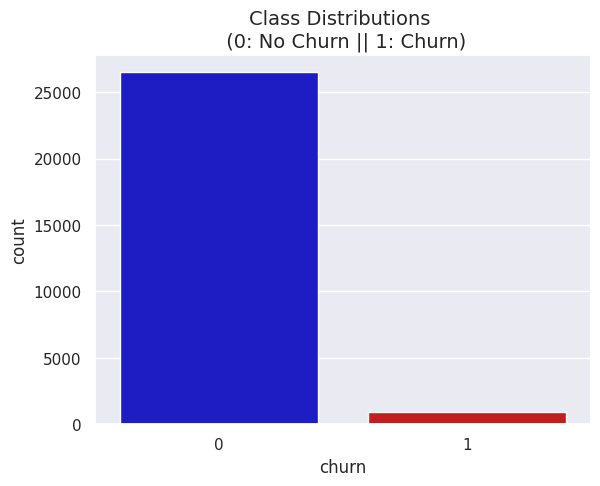

In [1348]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x= 'churn', data = df, palette=colors)
plt.title('Class Distributions \n (0: No Churn || 1: Churn)', fontsize=14)

# When to Use resampling methods
# -- Use resampling methods on your training set, never on your test set!

In [1349]:
# Create Train and Test Sets
from sklearn.model_selection import train_test_split
y = df.churn
X = df.drop('churn', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=56)

In [1350]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

0    18550
1      645
Name: churn, dtype: int64


index     churn
0      0  0.966397
1      1  0.033603

In [1351]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

0    7950
1     277
Name: churn, dtype: int64


index    churn
0      0  0.96633
1      1  0.03367

# Evaluation Metric

1. Accuracy =  TN+TP / TN+FP+FN+TP


2. Precision = TP / TP+FP


3. Recall = TP / TP+FN


4. F1 Score = 2 x (precision x recall) / (precision + recall)

In [1352]:
# Logistic Regression
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [1353]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [1354]:
y_pred = lreg.predict(X_test)

In [1355]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1356]:
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

In [1357]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1358]:
confusion7 = confusion_matrix(y_test, y_test_pred)
confusion7

array([[7950,    0],
       [ 277,    0]])

In [1359]:
TP = confusion7[1,1] # true positive 
TN = confusion7[0,0] # true negatives
FP = confusion7[0,1] # false positives
FN = confusion7[1,0] # false negatives

In [1360]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0       GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0     GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0       GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0       IMB_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN

Random Under-Sampling

1. Randomly remove majority class observations
2. Help balance the dataset
3. Discarded observations could have important information
4. May lead to bias

In [1361]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

1290

In [1362]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 645), (1, 645)]


In [1363]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [1364]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1365]:
y_train_pred = lreg_us.predict(X_train)
y_test_pred = lreg_us.predict(X_test)

In [1366]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1367]:
confusion8 = confusion_matrix(y_test, y_test_pred)
confusion8

array([[7950,    0],
       [ 277,    0]])

In [1368]:
TP = confusion8[1,1] # true positive 
TN = confusion8[0,0] # true negatives
FP = confusion8[0,1] # false positives
FN = confusion8[1,0] # false negatives

In [1369]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_US_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0       Gen_Logistic_Regression  0.897317     0.730769   
0  Gen_Logistic_Regression_0.22  0.897317     0.518382   
0  Gen_Logistic_Regression_0.08  0.897317     0.518382   
0     GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0       GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0     GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0       GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0       IMB_Logistic_Regression  0.966330     0.000000   
0    IMB_US_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN

Tomek Links

In [1370]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

19001

In [1371]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 18356), (1, 645)]


In [1372]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [1373]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1374]:
y_train_pred = lreg_tomek.predict(X_train)
y_test_pred = lreg_tomek.predict(X_test)

In [1375]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1376]:
confusion9 = confusion_matrix(y_test, y_test_pred)
confusion9

array([[7950,    0],
       [ 277,    0]])

In [1377]:
TP = confusion9[1,1] # true positive 
TN = confusion9[0,0] # true negatives
FP = confusion9[0,1] # false positives
FN = confusion9[1,0] # false negatives

In [1378]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_TOMEK_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0        Gen_Logistic_Regression  0.897317     0.730769   
0   Gen_Logistic_Regression_0.22  0.897317     0.518382   
0   Gen_Logistic_Regression_0.08  0.897317     0.518382   
0      GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0        GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0      GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0        GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0        IMB_Logistic_Regression  0.966330     0.000000   
0     IMB_US_Logistic_Regression  0.966330     0.000000   
0  IMB_TOMEK_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN

Random Over-Sampling

In [1379]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

37100

In [1380]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 18550), (1, 18550)]


In [1381]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [1382]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1383]:
y_train_pred = lreg_os.predict(X_train)
y_test_pred = lreg_os.predict(X_test)

In [1384]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1385]:
confusion10 = confusion_matrix(y_test, y_test_pred)
confusion10

array([[7950,    0],
       [ 277,    0]])

In [1386]:
TP = confusion10[1,1] # true positive 
TN = confusion10[0,0] # true negatives
FP = confusion10[0,1] # false positives
FN = confusion10[1,0] # false negatives

In [1387]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_OS_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0        Gen_Logistic_Regression  0.897317     0.730769   
0   Gen_Logistic_Regression_0.22  0.897317     0.518382   
0   Gen_Logistic_Regression_0.08  0.897317     0.518382   
0      GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0        GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0      GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0        GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0        IMB_Logistic_Regression  0.966330     0.000000   
0     IMB_US_Logistic_Regression  0.966330     0.000000   
0  IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0     IMB_OS_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN

SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

In [1388]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

37100

In [1389]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 18550), (1, 18550)]


In [1390]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [1391]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1392]:
y_train_pred = lreg_smt.predict(X_train)
y_test_pred = lreg_smt.predict(X_test)

In [1393]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1394]:
confusion11 = confusion_matrix(y_test, y_test_pred)
confusion11

array([[7950,    0],
       [ 277,    0]])

In [1395]:
TP = confusion11[1,1] # true positive 
TN = confusion11[0,0] # true negatives
FP = confusion11[0,1] # false positives
FN = confusion11[1,0] # false negatives

In [1396]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_SMOTE_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0        Gen_Logistic_Regression  0.897317     0.730769   
0   Gen_Logistic_Regression_0.22  0.897317     0.518382   
0   Gen_Logistic_Regression_0.08  0.897317     0.518382   
0      GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0        GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0      GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0        GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0        IMB_Logistic_Regression  0.966330     0.000000   
0     IMB_US_Logistic_Regression  0.966330     0.000000   
0  IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0     IMB_OS_Logistic_Regression  0.966330     0.000000   
0  IMB_SMOTE_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN

ADASYN


In [1397]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

37321

In [1398]:
print(sorted(Counter(y_resampled_ada).items()))

[(0, 18550), (1, 18771)]


In [1399]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [1400]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.03366962440743892
F1 score:  0.06514581373471308
Recall:  1.0
Precision:  0.03366962440743892

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7950
           1       0.03      1.00      0.07       277

    accuracy                           0.03      8227
   macro avg       0.02      0.50      0.03      8227
weighted avg       0.00      0.03      0.00      8227


 confussion matrix:
 [[   0 7950]
 [   0  277]]


In [1401]:
y_train_pred = lreg_ada.predict(X_train)
y_test_pred = lreg_ada.predict(X_test)

In [1402]:
accuracy_score(y_test, y_test_pred)

0.03366962440743892

In [1403]:
confusion13 = confusion_matrix(y_test, y_test_pred)
confusion13

array([[   0, 7950],
       [   0,  277]])

In [1404]:
TP = confusion13[1,1] # true positive 
TN = confusion13[0,0] # true negatives
FP = confusion13[0,1] # false positives
FN = confusion13[1,0] # false negatives

In [1405]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_ADASYN_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0         Gen_Logistic_Regression  0.897317     0.730769   
0    Gen_Logistic_Regression_0.22  0.897317     0.518382   
0    Gen_Logistic_Regression_0.08  0.897317     0.518382   
0       GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0         GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0       GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0         GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0         IMB_Logistic_Regression  0.966330     0.000000   
0      IMB_US_Logistic_Regression  0.966330     0.000000   
0   IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0      IMB_OS_Logistic_Regression  0.966330     0.000000   
0   IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0  IMB_ADASYN_Logistic_Regression  0.033670     1.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670

Combining Oversampling and Undersampling


In [1406]:
# SMOTE+TOMEK
from imblearn.combine import SMOTETomek
smt_tmk = SMOTETomek(random_state=45)
X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)
len(X_resampled_smt_tmk)

36940

In [1407]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 18470), (1, 18470)]


In [1408]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [1409]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.9663303755925611
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7950
           1       0.00      0.00      0.00       277

    accuracy                           0.97      8227
   macro avg       0.48      0.50      0.49      8227
weighted avg       0.93      0.97      0.95      8227


 confussion matrix:
 [[7950    0]
 [ 277    0]]


In [1410]:
y_train_pred = lreg_smt_tmk.predict(X_train)
y_test_pred = lreg_smt_tmk.predict(X_test)

In [1411]:
accuracy_score(y_test, y_test_pred)

0.9663303755925611

In [1412]:
confusion14 = confusion_matrix(y_test, y_test_pred)
confusion14

array([[7950,    0],
       [ 277,    0]])

In [1413]:
TP = confusion14[1,1] # true positive 
TN = confusion14[0,0] # true negatives
FP = confusion14[0,1] # false positives
FN = confusion14[1,0] # false negatives

In [1414]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_TOMEK_SMOTE_Logistic_Regression'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN

# Decision Trees

In [1415]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [1416]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9558769903974718
F1 score:  0.3575221238938053
Recall:  0.36462093862815886
Precision:  0.3506944444444444

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7950
           1       0.35      0.36      0.36       277

    accuracy                           0.96      8227
   macro avg       0.66      0.67      0.67      8227
weighted avg       0.96      0.96      0.96      8227


 confussion matrix:
 [[7763  187]
 [ 176  101]]


In [1417]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

In [1418]:
accuracy_score(y_test, y_test_pred)

0.9558769903974718

In [1419]:
confusion14 = confusion_matrix(y_test, y_test_pred)
confusion14

array([[7763,  187],
       [ 176,  101]])

In [1420]:
TP = confusion14[1,1] # true positive 
TN = confusion14[0,0] # true negatives
FP = confusion14[0,1] # false positives
FN = confusion14[1,0] # false negatives

In [1421]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694

In [1422]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [1423]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.8636197885012763
F1 score:  0.29962546816479396
Recall:  0.8664259927797834
Precision:  0.1811320754716981

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7950
           1       0.18      0.87      0.30       277

    accuracy                           0.86      8227
   macro avg       0.59      0.86      0.61      8227
weighted avg       0.97      0.86      0.90      8227


 confussion matrix:
 [[6865 1085]
 [  37  240]]


In [1424]:
y_train_pred = dtc_us.predict(X_train)
y_test_pred = dtc_us.predict(X_test)

In [1425]:
accuracy_score(y_test, y_test_pred)

0.8636197885012763

In [1426]:
confusion15 = confusion_matrix(y_test, y_test_pred)
confusion15

array([[6865, 1085],
       [  37,  240]])

In [1427]:
TP = confusion15[1,1] # true positive 
TN = confusion15[0,0] # true negatives
FP = confusion15[0,1] # false positives
FN = confusion15[1,0] # false negatives

In [1428]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_US_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132

In [1429]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [1430]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9584295612009238
F1 score:  0.3643122676579926
Recall:  0.35379061371841153
Precision:  0.37547892720306514

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7950
           1       0.38      0.35      0.36       277

    accuracy                           0.96      8227
   macro avg       0.68      0.67      0.67      8227
weighted avg       0.96      0.96      0.96      8227


 confussion matrix:
 [[7787  163]
 [ 179   98]]


In [1431]:
y_train_pred = dtc_tomek.predict(X_train)
y_test_pred = dtc_tomek.predict(X_test)

In [1432]:
accuracy_score(y_test, y_test_pred)

0.9584295612009238

In [1433]:
confusion16 = confusion_matrix(y_test, y_test_pred)
confusion16

array([[7787,  163],
       [ 179,   98]])

In [1434]:
TP = confusion16[1,1] # true positive 
TN = confusion16[0,0] # true negatives
FP = confusion16[0,1] # false positives
FN = confusion16[1,0] # false negatives

In [1435]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_Tomek_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479

In [1436]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [1437]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9600097240792512
F1 score:  0.4114490161001789
Recall:  0.4151624548736462
Precision:  0.4078014184397163

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      7950
           1       0.41      0.42      0.41       277

    accuracy                           0.96      8227
   macro avg       0.69      0.70      0.70      8227
weighted avg       0.96      0.96      0.96      8227


 confussion matrix:
 [[7783  167]
 [ 162  115]]


In [1438]:
y_train_pred = dtc_os.predict(X_train)
y_test_pred = dtc_os.predict(X_test)

In [1439]:
accuracy_score(y_test, y_test_pred)

0.9600097240792512

In [1440]:
confusion17 = confusion_matrix(y_test, y_test_pred)
confusion17

array([[7783,  167],
       [ 162,  115]])

In [1441]:
TP = confusion17[1,1] # true positive 
TN = confusion17[0,0] # true negatives
FP = confusion17[0,1] # false positives
FN = confusion17[1,0] # false negatives

In [1442]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_OS_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801

In [1443]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [1444]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.9380089947733073
F1 score:  0.35768261964735515
Recall:  0.5126353790613718
Precision:  0.2746615087040619

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      7950
           1       0.27      0.51      0.36       277

    accuracy                           0.94      8227
   macro avg       0.63      0.73      0.66      8227
weighted avg       0.96      0.94      0.95      8227


 confussion matrix:
 [[7575  375]
 [ 135  142]]


In [1445]:
y_train_pred = dtc_smt.predict(X_train)
y_test_pred = dtc_smt.predict(X_test)

In [1446]:
accuracy_score(y_test, y_test_pred)

0.9380089947733073

In [1447]:
confusion18 = confusion_matrix(y_test, y_test_pred)
confusion18

array([[7575,  375],
       [ 135,  142]])

In [1448]:
TP = confusion18[1,1] # true positive 
TN = confusion18[0,0] # true negatives
FP = confusion18[0,1] # false positives
FN = confusion18[1,0] # false negatives

In [1449]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_SMOTE_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662

In [1450]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [1451]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.9414124225112435
F1 score:  0.40049751243781095
Recall:  0.5812274368231047
Precision:  0.3055028462998102

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      7950
           1       0.31      0.58      0.40       277

    accuracy                           0.94      8227
   macro avg       0.65      0.77      0.68      8227
weighted avg       0.96      0.94      0.95      8227


 confussion matrix:
 [[7584  366]
 [ 116  161]]


In [1452]:
y_train_pred = dtc_ada.predict(X_train)
y_test_pred = dtc_ada.predict(X_test)

In [1453]:
accuracy_score(y_test, y_test_pred)

0.9414124225112435

In [1454]:
confusion19 = confusion_matrix(y_test, y_test_pred)
confusion19

array([[7584,  366],
       [ 116,  161]])

In [1455]:
TP = confusion19[1,1] # true positive 
TN = confusion19[0,0] # true negatives
FP = confusion19[0,1] # false positives
FN = confusion19[1,0] # false negatives

In [1456]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_ADASYN_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503

In [1457]:
# Decision Trees - SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [1458]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.9417770754831651
F1 score:  0.3851091142490372
Recall:  0.5415162454873647
Precision:  0.29880478087649404

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7950
           1       0.30      0.54      0.39       277

    accuracy                           0.94      8227
   macro avg       0.64      0.75      0.68      8227
weighted avg       0.96      0.94      0.95      8227


 confussion matrix:
 [[7598  352]
 [ 127  150]]


In [1459]:
y_train_pred = dtc_smt_tmk.predict(X_train)
y_test_pred = dtc_smt_tmk.predict(X_test)

In [1460]:
accuracy_score(y_test, y_test_pred)

0.9417770754831651

In [1461]:
confusion20 = confusion_matrix(y_test, y_test_pred)
confusion20

array([[7598,  352],
       [ 127,  150]])

In [1462]:
TP = confusion20[1,1] # true positive 
TN = confusion20[0,0] # true negatives
FP = confusion20[0,1] # false positives
FN = confusion20[1,0] # false negatives

In [1463]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_SMOTE_TOMEK_Decision_Tree'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805

# Random Forest

In [1464]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [1465]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9680320894615291
F1 score:  0.36009732360097324
Recall:  0.26714801444043323
Precision:  0.5522388059701493

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      7950
           1       0.55      0.27      0.36       277

    accuracy                           0.97      8227
   macro avg       0.76      0.63      0.67      8227
weighted avg       0.96      0.97      0.96      8227


 confussion matrix:
 [[7890   60]
 [ 203   74]]


In [1466]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [1467]:
accuracy_score(y_test, y_test_pred)

0.9680320894615291

In [1468]:
confusion21 = confusion_matrix(y_test, y_test_pred)
confusion21

array([[7890,   60],
       [ 203,   74]])

In [1469]:
TP = confusion21[1,1] # true positive 
TN = confusion21[0,0] # true negatives
FP = confusion21[0,1] # false positives
FN = confusion21[1,0] # false negatives

In [1470]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239

In [1471]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [1472]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.9048255743284308
F1 score:  0.4009181331293037
Recall:  0.9458483754512635
Precision:  0.2543689320388349

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95      7950
           1       0.25      0.95      0.40       277

    accuracy                           0.90      8227
   macro avg       0.63      0.92      0.67      8227
weighted avg       0.97      0.90      0.93      8227


 confussion matrix:
 [[7182  768]
 [  15  262]]


In [1473]:
y_train_pred = rf_us.predict(X_train)
y_test_pred = rf_us.predict(X_test)

In [1474]:
accuracy_score(y_test, y_test_pred)

0.9048255743284308

In [1475]:
confusion22 = confusion_matrix(y_test, y_test_pred)
confusion22

array([[7182,  768],
       [  15,  262]])

In [1476]:
TP = confusion22[1,1] # true positive 
TN = confusion22[0,0] # true negatives
FP = confusion22[0,1] # false positives
FN = confusion22[1,0] # false negatives

In [1477]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_US_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369

In [1478]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier()
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [1479]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9687613954053725
F1 score:  0.3952941176470588
Recall:  0.30324909747292417
Precision:  0.5675675675675675

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7950
           1       0.57      0.30      0.40       277

    accuracy                           0.97      8227
   macro avg       0.77      0.65      0.69      8227
weighted avg       0.96      0.97      0.96      8227


 confussion matrix:
 [[7886   64]
 [ 193   84]]


In [1480]:
y_train_pred = rf_tomek.predict(X_train)
y_test_pred = rf_tomek.predict(X_test)

In [1481]:
accuracy_score(y_test, y_test_pred)

0.9687613954053725

In [1482]:
confusion23 = confusion_matrix(y_test, y_test_pred)
confusion23

array([[7886,   64],
       [ 193,   84]])

In [1483]:
TP = confusion23[1,1] # true positive 
TN = confusion23[0,0] # true negatives
FP = confusion23[0,1] # false positives
FN = confusion23[1,0] # false negatives

In [1484]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_TOMEK_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   
0              IMB_TOMEK_Random_Forest  0.968761     0.303249   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369  
0                  0.567568

In [1485]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [1486]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9690044973866537
F1 score:  0.49101796407185627
Recall:  0.44404332129963897
Precision:  0.5491071428571429

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7950
           1       0.55      0.44      0.49       277

    accuracy                           0.97      8227
   macro avg       0.76      0.72      0.74      8227
weighted avg       0.97      0.97      0.97      8227


 confussion matrix:
 [[7849  101]
 [ 154  123]]


In [1487]:
y_train_pred = rf_os.predict(X_train)
y_test_pred = rf_os.predict(X_test)

In [1488]:
accuracy_score(y_test, y_test_pred)

0.9690044973866537

In [1489]:
confusion24 = confusion_matrix(y_test, y_test_pred)
confusion24

array([[7849,  101],
       [ 154,  123]])

In [1490]:
TP = confusion24[1,1] # true positive 
TN = confusion24[0,0] # true negatives
FP = confusion24[0,1] # false positives
FN = confusion24[1,0] # false negatives

In [1491]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_OS_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   
0              IMB_TOMEK_Random_Forest  0.968761     0.303249   
0                 IMB_OS_Random_Forest  0.969004     0.444043   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369  
0                  0.567568  
0                  0.549107

In [1492]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [1493]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9534459705846603
F1 score:  0.46433566433566437
Recall:  0.5992779783393501
Precision:  0.3789954337899543

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7950
           1       0.38      0.60      0.46       277

    accuracy                           0.95      8227
   macro avg       0.68      0.78      0.72      8227
weighted avg       0.97      0.95      0.96      8227


 confussion matrix:
 [[7678  272]
 [ 111  166]]


In [1494]:
y_train_pred = rf_smt.predict(X_train)
y_test_pred = rf_smt.predict(X_test)

In [1495]:
accuracy_score(y_test, y_test_pred)

0.9534459705846603

In [1496]:
confusion25 = confusion_matrix(y_test, y_test_pred)
confusion25

array([[7678,  272],
       [ 111,  166]])

In [1497]:
TP = confusion25[1,1] # true positive 
TN = confusion25[0,0] # true negatives
FP = confusion25[0,1] # false positives
FN = confusion25[1,0] # false negatives

In [1498]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_SMOTE_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   
0              IMB_TOMEK_Random_Forest  0.968761     0.303249   
0                 IMB_OS_Random_Forest  0.969004     0.444043   
0              IMB_SMOTE_Random_Forest  0.953446     0.599278   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369  
0                  0.567568  
0                  0.549107  
0                  0.378995

In [1499]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [1500]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9532028686033791
F1 score:  0.46896551724137925
Recall:  0.6137184115523465
Precision:  0.3794642857142857

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7950
           1       0.38      0.61      0.47       277

    accuracy                           0.95      8227
   macro avg       0.68      0.79      0.72      8227
weighted avg       0.97      0.95      0.96      8227


 confussion matrix:
 [[7672  278]
 [ 107  170]]


In [1501]:
y_train_pred = rf_ada.predict(X_train)
y_test_pred = rf_ada.predict(X_test)

In [1502]:
accuracy_score(y_test, y_test_pred)

0.9532028686033791

In [1503]:
confusion26 = confusion_matrix(y_test, y_test_pred)
confusion26

array([[7672,  278],
       [ 107,  170]])

In [1504]:
TP = confusion26[1,1] # true positive 
TN = confusion26[0,0] # true negatives
FP = confusion26[0,1] # false positives
FN = confusion26[1,0] # false negatives

In [1505]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_ADASYN_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   
0              IMB_TOMEK_Random_Forest  0.968761     0.303249   
0                 IMB_OS_Random_Forest  0.969004     0.444043   
0              IMB_SMOTE_Random_Forest  0.953446     0.599278   
0             IMB_ADASYN_Random_Forest  0.953203     0.613718   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369  
0                  0.567568  
0                  0.549107  
0                  0.378995  
0                  0.379464

In [1506]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier()
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [1507]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9529597666220979
F1 score:  0.46025104602510464
Recall:  0.5956678700361011
Precision:  0.375

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7950
           1       0.38      0.60      0.46       277

    accuracy                           0.95      8227
   macro avg       0.68      0.78      0.72      8227
weighted avg       0.97      0.95      0.96      8227


 confussion matrix:
 [[7675  275]
 [ 112  165]]


In [1508]:
y_train_pred = rf_smt_tmk.predict(X_train)
y_test_pred = rf_smt_tmk.predict(X_test)

In [1509]:
accuracy_score(y_test, y_test_pred)

0.9529597666220979

In [1510]:
confusion27 = confusion_matrix(y_test, y_test_pred)
confusion27

array([[7675,  275],
       [ 112,  165]])

In [1511]:
TP = confusion27[1,1] # true positive 
TN = confusion27[0,0] # true negatives
FP = confusion27[0,1] # false positives
FN = confusion27[1,0] # false negatives

In [1512]:
snstvty = TP / float(TP+FN)
ppv = (TP / float(TP+FP))
acc = accuracy_score(y_test, y_test_pred)
tempResults = pd.DataFrame({'Method':['IMB_SMOTE+TOMEK_Random_Forest'],'ACCURACY': [acc] , 'SENSITIVITY': [snstvty], 'POSITIVE PREDICTED VALUE': [ppv]})
results = pd.concat([results, tempResults])
results = results[['Method','ACCURACY' ,'SENSITIVITY' , 'POSITIVE PREDICTED VALUE']]
results

Method  ACCURACY  SENSITIVITY  \
0              Gen_Logistic_Regression  0.897317     0.730769   
0         Gen_Logistic_Regression_0.22  0.897317     0.518382   
0         Gen_Logistic_Regression_0.08  0.897317     0.518382   
0            GEN_DECISION_TREE_UNTUNED  0.968883     0.477941   
0              GEN_DECISION_TREE_TUNED  0.969369     0.466912   
0            GEN_RANDOM_FOREST_UNTUNED  0.967424     0.058824   
0              GEN_RANDOM_FOREST_TUNED  0.971314     0.371324   
0              IMB_Logistic_Regression  0.966330     0.000000   
0           IMB_US_Logistic_Regression  0.966330     0.000000   
0        IMB_TOMEK_Logistic_Regression  0.966330     0.000000   
0           IMB_OS_Logistic_Regression  0.966330     0.000000   
0        IMB_SMOTE_Logistic_Regression  0.966330     0.000000   
0       IMB_ADASYN_Logistic_Regression  0.033670     1.000000   
0  IMB_TOMEK_SMOTE_Logistic_Regression  0.966330     0.000000   
0                    IMB_Decision_Tree  0.955877     0.364621   
0                 IMB_US_Decision_Tree  0.863620     0.866426   
0              IMB_Tomek_Decision_Tree  0.958430     0.353791   
0                 IMB_OS_Decision_Tree  0.960010     0.415162   
0              IMB_SMOTE_Decision_Tree  0.938009     0.512635   
0             IMB_ADASYN_Decision_Tree  0.941412     0.581227   
0        IMB_SMOTE_TOMEK_Decision_Tree  0.941777     0.541516   
0                    IMB_Random_Forest  0.968032     0.267148   
0                 IMB_US_Random_Forest  0.904826     0.945848   
0              IMB_TOMEK_Random_Forest  0.968761     0.303249   
0                 IMB_OS_Random_Forest  0.969004     0.444043   
0              IMB_SMOTE_Random_Forest  0.953446     0.599278   
0             IMB_ADASYN_Random_Forest  0.953203     0.613718   
0        IMB_SMOTE+TOMEK_Random_Forest  0.952960     0.595668   

   POSITIVE PREDICTED VALUE  
0                  0.209159  
0                  0.413490  
0                  0.413490  
0                  0.532787  
0                  0.542735  
0                  0.571429  
0                  0.608434  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                       NaN  
0                  0.033670  
0                       NaN  
0                  0.350694  
0                  0.181132  
0                  0.375479  
0                  0.407801  
0                  0.274662  
0                  0.305503  
0                  0.298805  
0                  0.552239  
0                  0.254369  
0                  0.567568  
0                  0.549107  
0                  0.378995  
0                  0.379464  
0                  0.375000

**CONCLUSION**
1. Of all the Models we evaluated, Tuned Random Forest gave the best accuracy at 97.13%.
2. After handling Class Imbalance we observe that Logistic Regression made from ADASYN sampling gives highest sensitivity 100%. 
3. However due to extremely low Accuracy of such model, it's better to consider Random Forest derived from Random Under Sampling of data at 94%.
4. As per POSITIVE PREDICTED VALUE, Random Forest with parameters  n_estimators=10, max_depth=4, max_features=5, random_state=100 is the best model at 57.14%